# **Market Segmentation: McDonalds:**

| S.No | Task Description                           |
|------|--------------------------------------------|
| 1    | Importing libraries                       |
| 2    | Data Ingestion                            |
| 3    | Exploratory Data Analysis                 |
| 4    | Data Preprocessing                        |
| 5    | Applying Dimensionality Reduction Technique - Principal Component Analysis |
| 6    | K-Means Clustering Algorithm               |


### **1. Importing Libraries:**

In [1]:
import warnings   # Importing the warnings module to handle warning messages
# Avoid deprecation warnings (if applicable)
warnings.filterwarnings("ignore", category=DeprecationWarning)  # Uncomment if needed

In [2]:
# importing libraries
import pandas as pd  # Importing the pandas library and aliasing it as 'pd' for convenience
import numpy as np   # Importing the numpy library and aliasing it as 'np' for convenience
import seaborn as sns  # Importing the seaborn library and aliasing it as 'sns' for convenience
import matplotlib.pyplot as plt  # Importing the matplotlib.pyplot module and aliasing it as 'plt' for convenience

from sklearn.preprocessing import LabelEncoder  # Importing LabelEncoder from scikit-learn preprocessing module
from sklearn.decomposition import PCA   # Importing PCA (Principal Component Analysis) from scikit-learn decomposition module
from sklearn import preprocessing   # Importing preprocessing module from scikit-learn
from sklearn.cluster import KMeans   # Importing KMeans clustering algorithm from scikit-learn

from statsmodels.graphics.mosaicplot import mosaic   # Importing mosaic function from statsmodels.graphics.mosaicplot module

from yellowbrick.cluster import KElbowVisualizer   # Importing KElbowVisualizer class from yellowbrick.cluster module
from collections import Counter   # Importing Counter class from collections module
from itertools import product   # Importing product function from itertools module
from bioinfokit.visuz import cluster   # Importing cluster submodule from bioinfokit.visuz module

### **2. Data Ingestion:**

In [3]:
# Load the dataset (from local directory)
df = pd.read_csv("D:\\Projects\\Feynn Labs\\Feyyn-Labs-Project-2\\mcdonalds_dataset.csv")

# Display the first five rows from the dataset 
df.head(5)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


### **3. Exploratory Data Analysis:**

| S.No | Task Description                                                                                        | Code Snippet                                                                                            |
|------|---------------------------------------------------------------------------------------------------------|---------------------------------------------------------------------------------------------------------|
| 1    | Display the first few rows of the dataset                                                               | `df.head()`                                                                                             |
| 2    | Check for missing values                                                                                | `df.isnull().sum()`                                                                                     |
| 3    | Display information about the dataset                                                                   | `df.info()`                                                                                             |
| 4    | Summary statistics of numerical features                                                                | `df.describe()`                                                                                         |
| 5    | Visualizing distribution of categorical variables with percentage annotations                            | `sns.countplot(data=df, x='column_name')`                                                              |
| 6    | Visualizing distribution of numerical variables                                                         | `sns.histplot(data=df, x='numerical_column', kde=True, color='skyblue')`                                |
| 7    | Correlation Matrix                                                                                      | `sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')`                                         |
| 8    | Age vs Visit Frequency by Gender                                                                        | `sns.boxplot(data=df, x='VisitFrequency', y='Age', hue='Gender')`                                         |
| 9    | Gender Distribution across Features                                                                     | `sns.countplot(data=df, x='feature_column', hue='Gender')`                                                |
| 10   | Targeted Variable (Feature) Distribution                                                                | `sns.countplot(data=df, x='target_variable')`                                                            |
| 11   | Demographic segmentation using 'Age' & 'Gender'                                                         | See below                                                                                               |
| 12   | Psychographic segmentation using 'Like'                                                                 | See below                                                                                               |


In [4]:
# Displaying the first few rows of the DataFrame
print("First 5 rows of the dataset:")
display(df.head())

First 5 rows of the dataset:


,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [5]:
# Checking for missing values
print("\nMissing values:")
display(df.isnull().sum())


Missing values:


yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

In [6]:
# Display information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [7]:
# Summary statistics of numerical features
print("\nSummary statistics of numerical features:")
display(df.describe())


Summary statistics of numerical features:


,Age
count,1453.000000
mean,44.604955
std,14.221178
min,18.000000
25%,33.000000
50%,45.000000
75%,57.000000
max,71.000000


#### **Visualizing distribution of categorical variables with percentage annotations:**

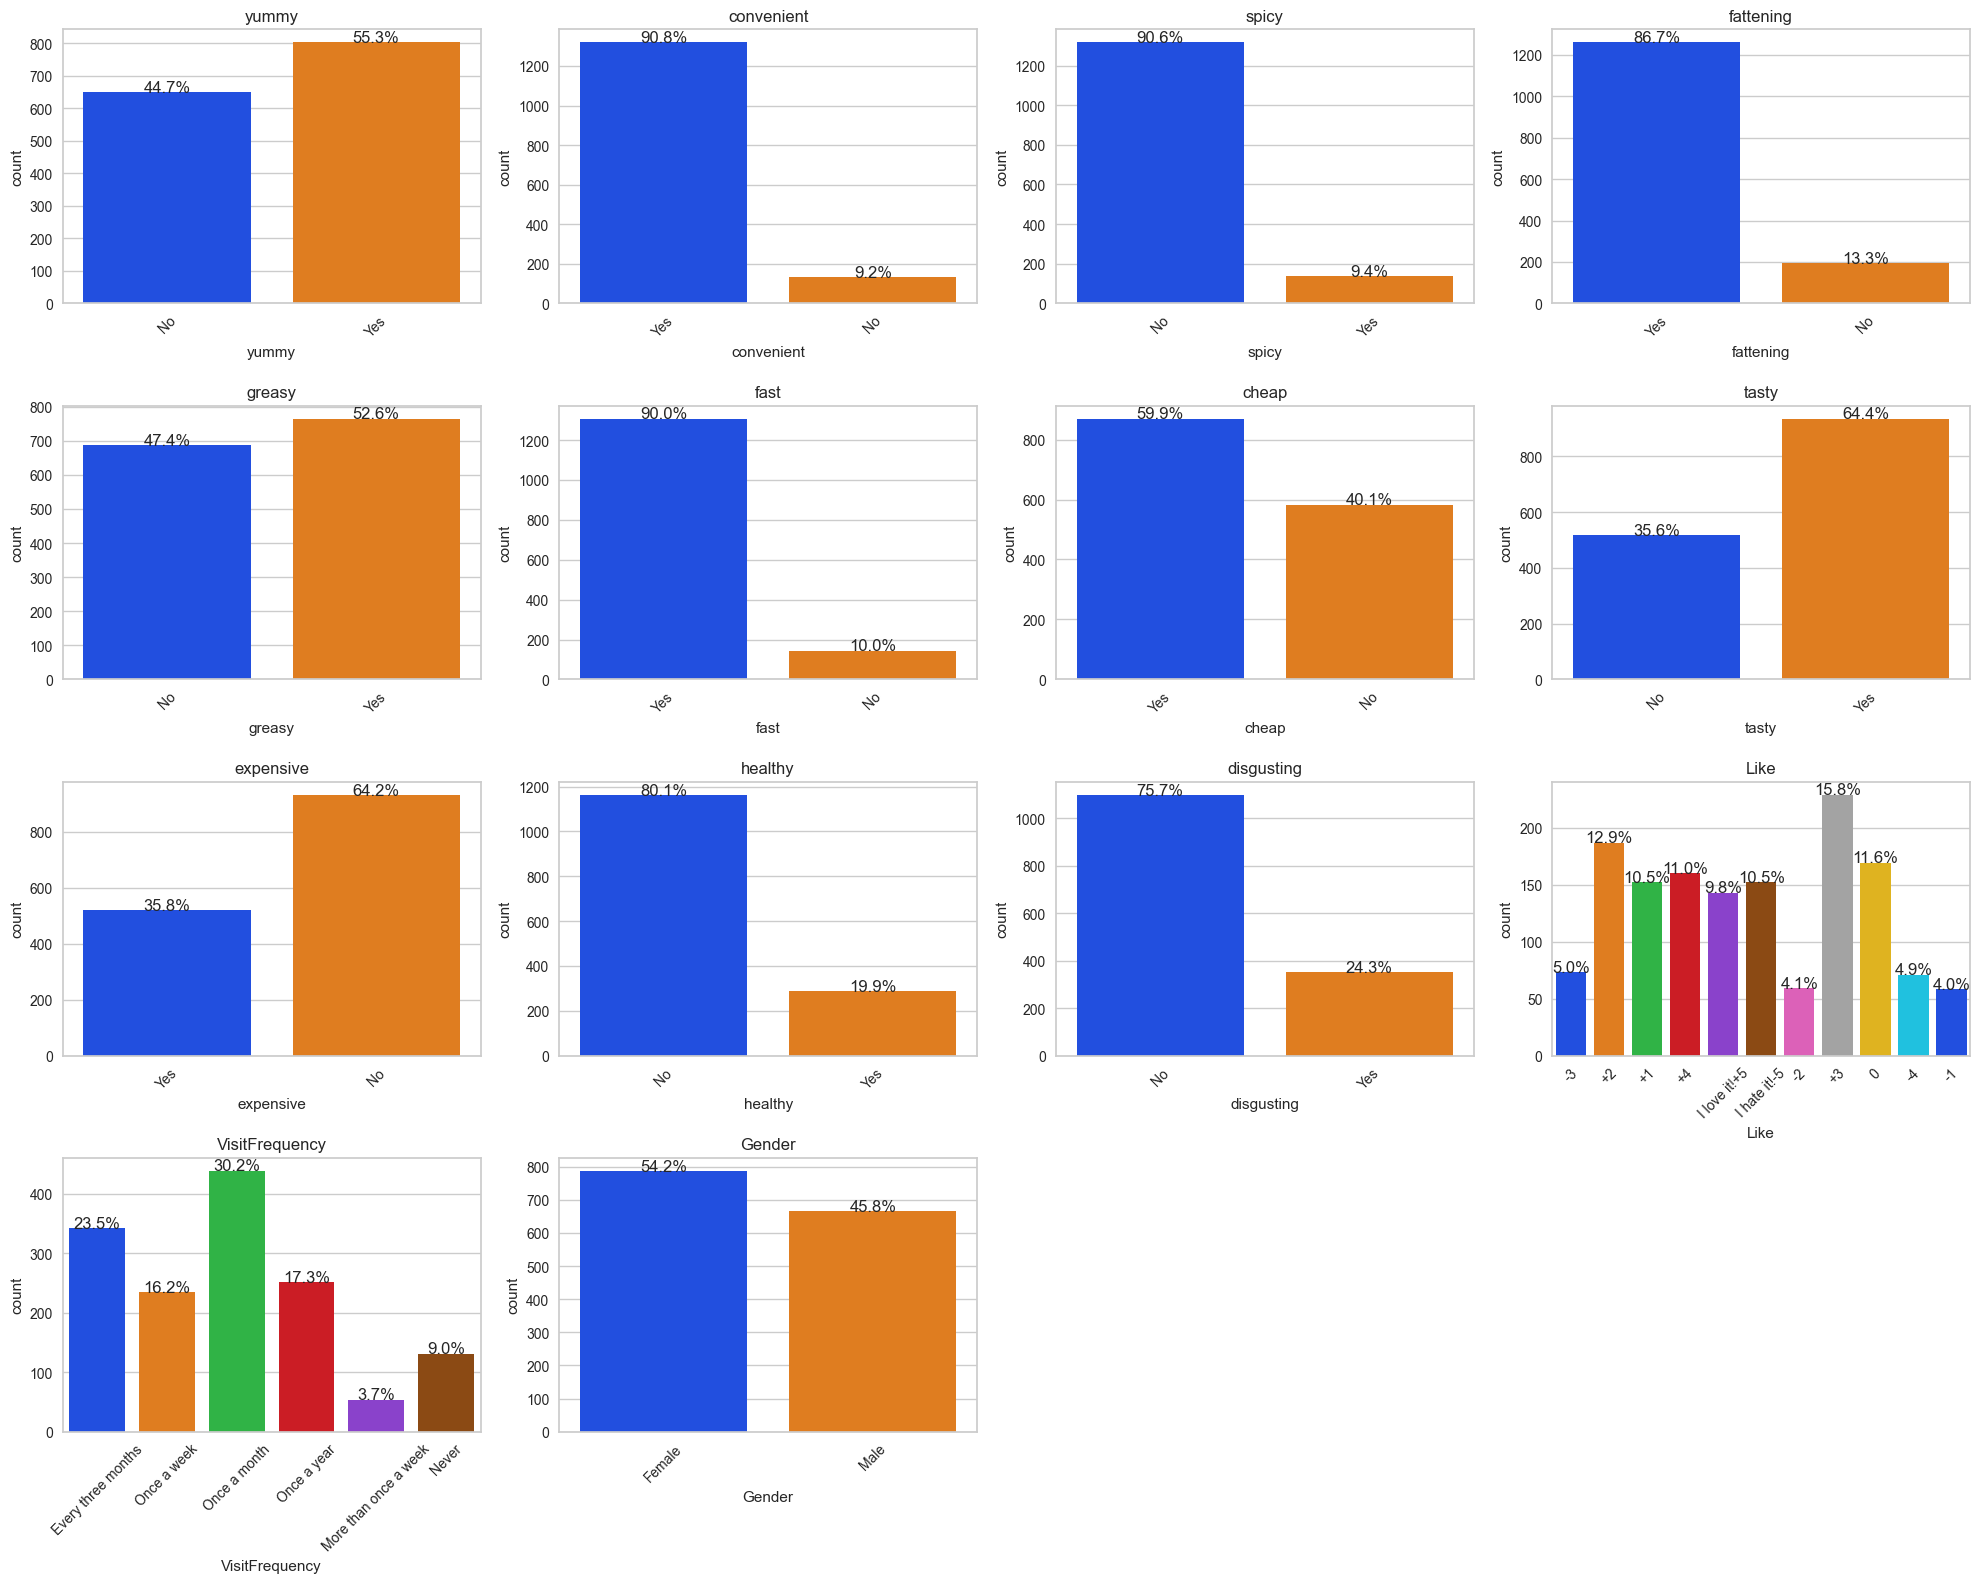

In [8]:
num_cols = len(df.select_dtypes(include='object').columns)
num_rows = (num_cols + 3) // 4  # Adjusting number of rows dynamically

plt.figure(figsize=(20, 4*num_rows))
for i, col in enumerate(df.select_dtypes(include='object').columns):
    plt.subplot(num_rows, 4, i+1)  # Adjusting number of subplots dynamically
    sns.countplot(data=df, x=col, hue=col, dodge=False, palette='bright')  # Update palette to hue
    plt.title(col)
    plt.xticks(rotation=45)
    
    # Adding percentage annotations to the bars
    total_count = len(df[col])
    for p in plt.gca().patches:
        height = p.get_height()
        plt.gca().text(p.get_x() + p.get_width()/2, height + 0.5, f'{height/total_count:.1%}', ha='center')

plt.tight_layout()

# Save the figure
plt.savefig("categorical_distribution_with_percentage.png")

# Display the figure
plt.show()


#### **Visualizing distribution of numerical variables:**

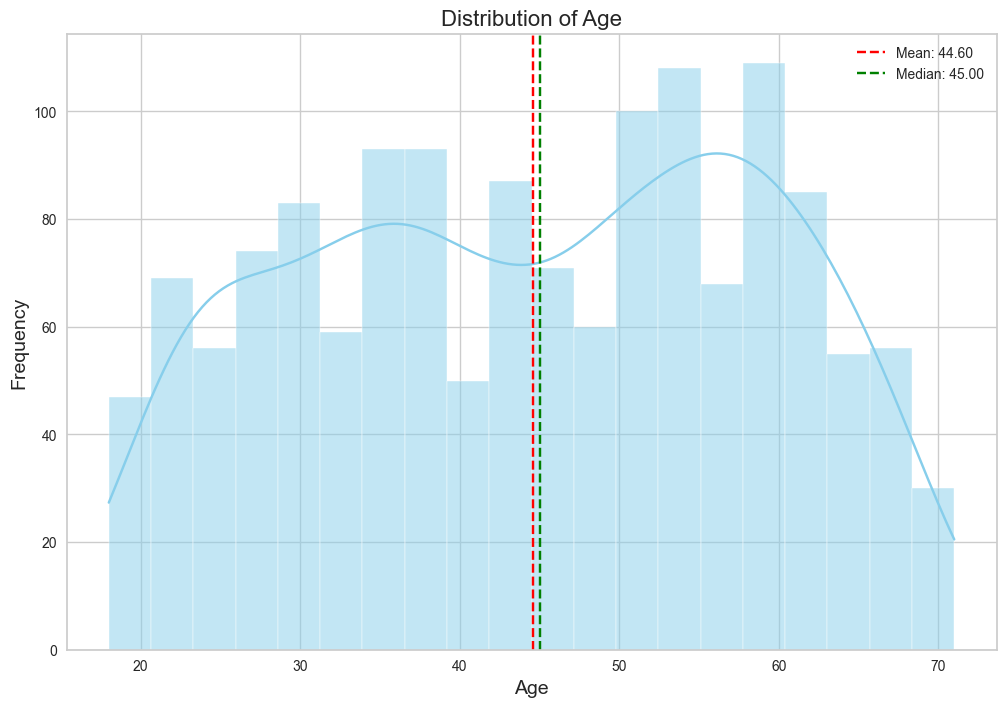

In [9]:
# Set the style
sns.set_style("whitegrid")

# Increase figure size
plt.figure(figsize=(12, 8))

# Plot the histogram with KDE
sns.histplot(data=df, x='Age', kde=True, color='skyblue', bins=20)

# Title and labels
plt.title('Distribution of Age', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Add mean and median lines
mean_age = df['Age'].mean()
median_age = df['Age'].median()
plt.axvline(mean_age, color='red', linestyle='--', label=f'Mean: {mean_age:.2f}')
plt.axvline(median_age, color='green', linestyle='--', label=f'Median: {median_age:.2f}')

# Add legend
plt.legend()

# Save the figure
plt.savefig("numerical_distribution.png", dpi=300)

# Show plot
plt.show()

In [10]:
# Retrieving the value counts of the 'Age' column
df['Age'].value_counts()

Age
55    53
60    38
37    37
59    36
57    36
52    36
58    35
36    35
49    34
62    34
50    34
32    33
44    32
56    32
64    32
53    31
26    31
24    30
35    30
51    30
47    30
42    30
23    30
39    29
29    28
34    28
30    28
38    27
40    27
31    27
25    26
33    26
61    26
67    26
48    26
43    25
27    25
63    25
54    24
41    23
22    23
65    23
45    22
20    21
46    19
28    18
66    17
21    16
18    16
70    15
69    14
68    13
19    10
71     1
Name: count, dtype: int64

#### **Correlation Matrix:**

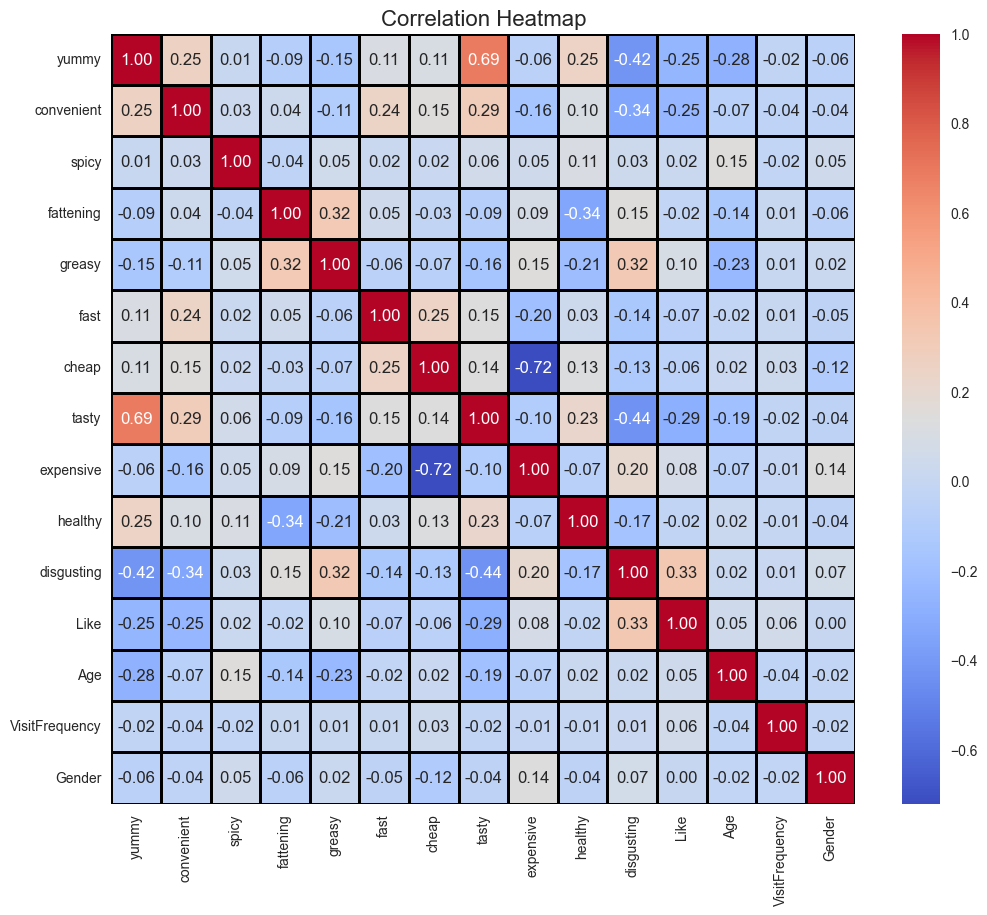

In [11]:
from sklearn.preprocessing import LabelEncoder

# Convert categorical variables to numerical using label encoding
df_encoded = df.copy()
label_encoder = LabelEncoder()
for col in df_encoded.select_dtypes(include='object').columns:
    df_encoded[col] = label_encoder.fit_transform(df_encoded[col])

# Compute correlation matrix
correlation_matrix = df_encoded.corr()

# Set the style
sns.set_style("whitegrid")

# Increase figure size
plt.figure(figsize=(12, 10))

# Visualize correlation heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1, linecolor='black')

# Title
plt.title('Correlation Heatmap', fontsize=16)

# Save the figure
plt.savefig("correlation_heatmap.png", dpi=300)

# Show plot
plt.show()

#### **Based on the correlations between different columns:**

- "Yummy" and "Tasty" have a strong positive correlation of 0.69.
- "Like" and "Disgusting" have a moderate positive correlation of 0.33.
- "Greasy" and "Disgusting" also have a moderate positive correlation of 0.32.
- "Convenient" and "Tasty" have a weak positive correlation of 0.29.
- "Convenient" and "Yummy" have a weak positive correlation of 0.25.
- "Healthy" and "Yummy" have a weak positive correlation of 0.25.
- "Healthy" and "Tasty" have a weak positive correlation of 0.23.

From these correlations, we can infer that:
- There is a strong positive association between the perception of "Yummy" and "Tasty," suggesting that items considered tasty are also perceived as yummy.
- Items that are liked tend to have a moderate positive association with those considered disgusting, implying that opinions on taste are not always consistent.
- The moderate positive correlation between "Greasy" and "Disgusting" suggests that items perceived as greasy are also likely to be considered disgusting.
- There are weak positive correlations between "Convenient" and "Tasty," "Convenient" and "Yummy," and "Healthy" and both "Yummy" and "Tasty," indicating some degree of association but not as strong as in the previous cases.

Overall, these correlations provide insights into the relationships between different perceptions of food items, highlighting potential patterns in subjective preferences and associations.


#### **Age vs Visit Frequency by Gender:**

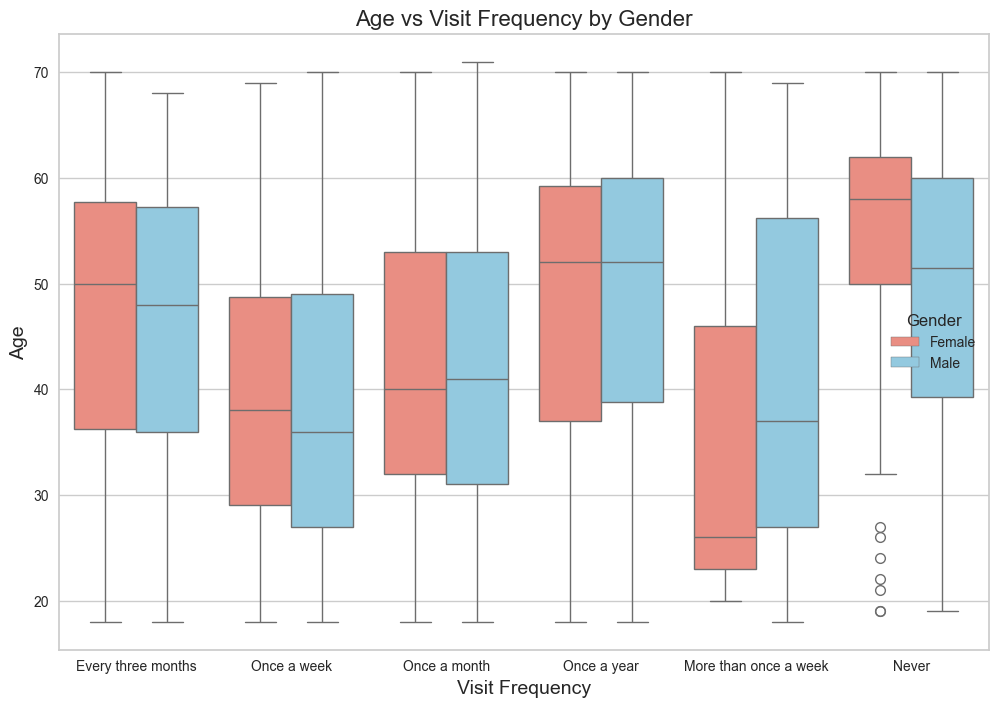

In [12]:
# Set the style
sns.set_style("whitegrid")

# Increase figure size
plt.figure(figsize=(12, 8))

# Customizing colors for better visualization
palette_colors = {"Male": "skyblue", "Female": "salmon"}

# Plotting the boxplot
sns.boxplot(data=df, x='VisitFrequency', y='Age', hue='Gender', palette=palette_colors)

# Title
plt.title('Age vs Visit Frequency by Gender', fontsize=16)

# Add legend with title
plt.legend(title='Gender')

# Labeling axes
plt.xlabel('Visit Frequency', fontsize=14)
plt.ylabel('Age', fontsize=14)

# Save the figure
plt.savefig("numerical_vs_categorical.png", dpi=300)

# Show plot
plt.show()

In [13]:
# Retrieving the value counts of the 'VisitFrequency' column
df['VisitFrequency'].value_counts()

VisitFrequency
Once a month             439
Every three months       342
Once a year              252
Once a week              235
Never                    131
More than once a week     54
Name: count, dtype: int64

#### **Gender Distribution Across Features:**

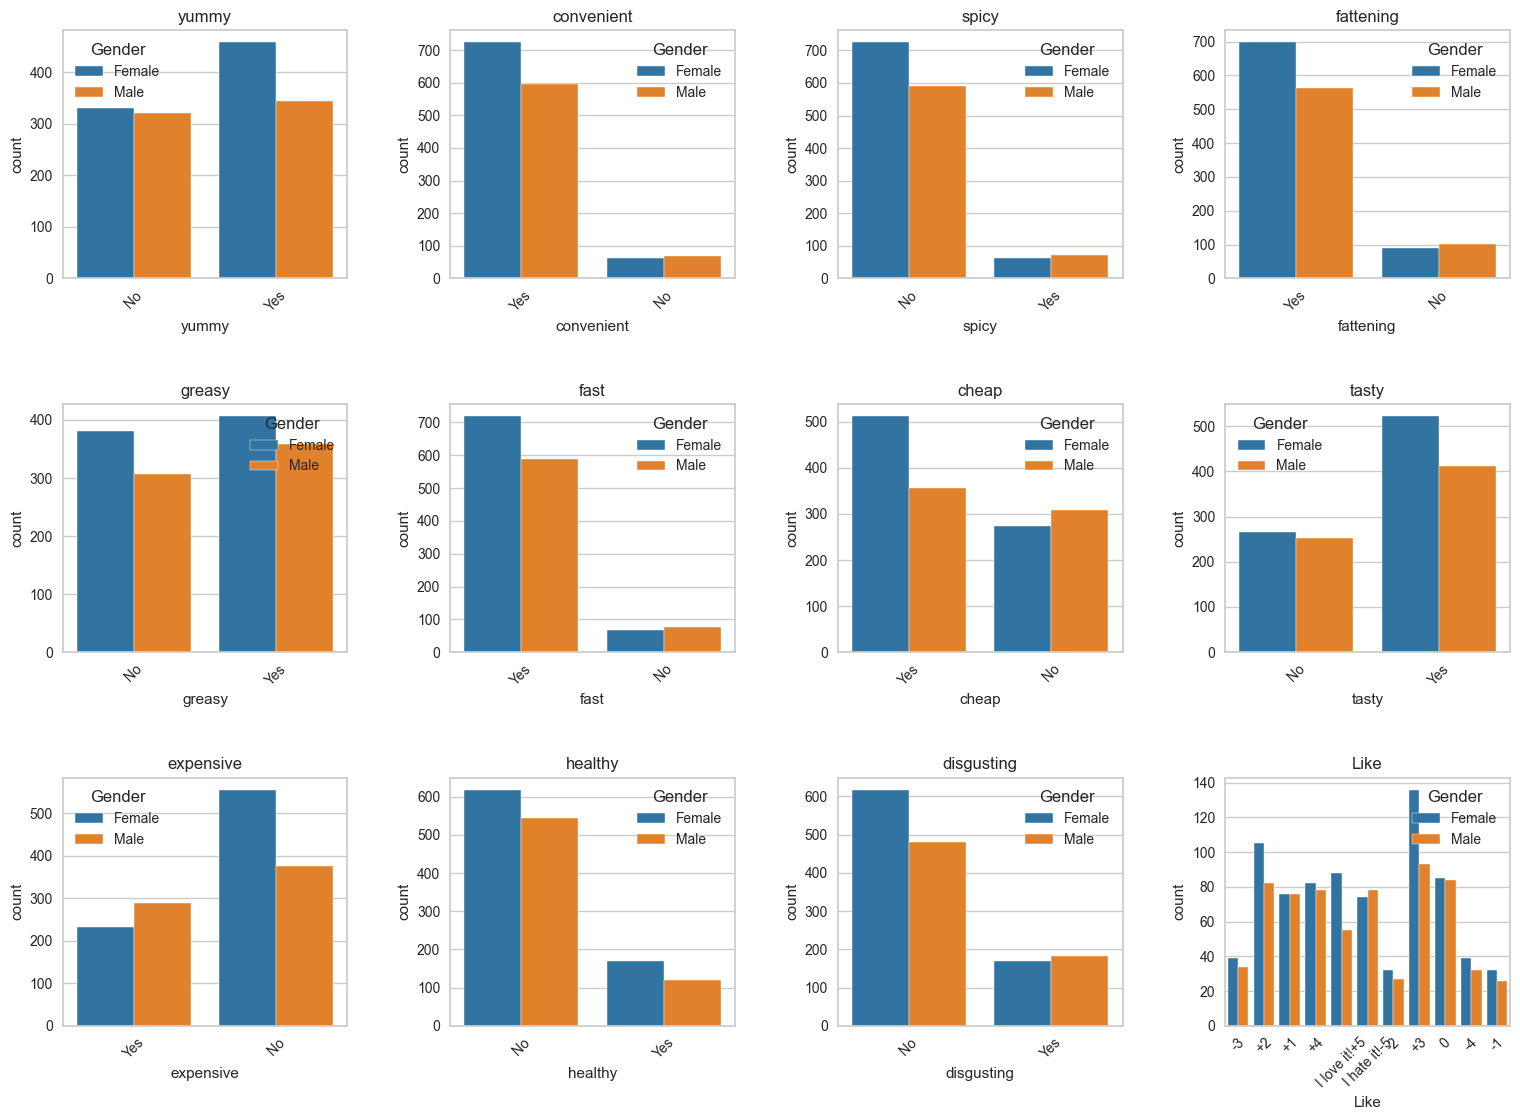

In [14]:
# Set the style
sns.set_style("whitegrid")

# Define custom color palette with darker and brighter colors
custom_palette = ["#1f77b4", "#ff7f0e"]  # Blue and orange

# Increase figure size
plt.figure(figsize=(16, 12))

# Define the number of rows and columns for subplots
num_cols = 4
num_rows = (len(df.columns[:-3]) + num_cols - 1) // num_cols

# Iterate over columns and plot gender distribution
for i, col in enumerate(df.columns[:-3]):
    plt.subplot(num_rows, num_cols, i+1)
    sns.countplot(data=df, x=col, hue='Gender', palette=custom_palette)
    plt.title(col)
    plt.xticks(rotation=45)
    plt.legend(title='Gender')

# Adjust layout and add spacing between subplots
plt.tight_layout(pad=3.0)

# Save the figure
plt.savefig("gender_distribution_across_features.png", dpi=300)

# Show plot
plt.show()

#### **Targeted Variable Distribution:**

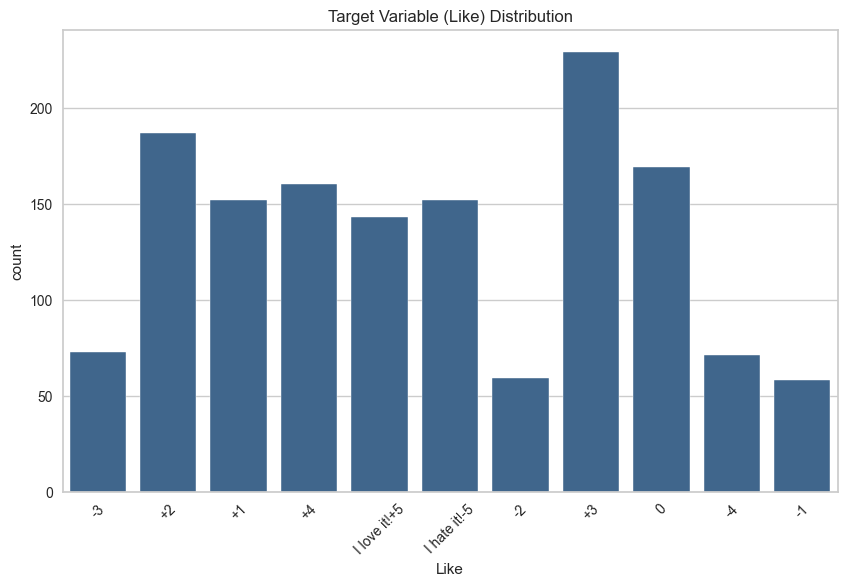

In [15]:
# Increase figure size
plt.figure(figsize=(10, 6))

# Plot target variable distribution with rotated x-axis labels
sns.countplot(data=df, x='Like', color=(0.2, 0.4, 0.6))  # Dark blue color
plt.title('Target Variable (Like) Distribution')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Save the figure
plt.savefig("like_distribution.png", dpi=300)

# Show plot
plt.show()

In [16]:
# Target Variable 
df["Like"].value_counts()

Like
+3              229
+2              187
0               169
+4              160
+1              152
I hate it!-5    152
I love it!+5    143
-3               73
-4               71
-2               59
-1               58
Name: count, dtype: int64

| Like         | Count |
|--------------|-------|
| +3           | 229   |
| +2           | 187   |
| 0            | 169   |
| +4           | 160   |
| +1           | 152   |
| I hate it!-5| 152   |
| I love it!+5| 143   |
| -3           | 73    |
| -4           | 71    |
| -2           | 59    |
| -1           | 58    |


**NOTE**: The dataset contains three columns with different types of features compared to other columns. The "Like" and "Age" columns represent numerical features, while the "VisitFrequency" column represents multiclass features.


#### **`Gender` feature:**

In [17]:
# Retrieving the value counts of the 'Gender' column
df['Gender'].value_counts()

Gender
Female    788
Male      665
Name: count, dtype: int64

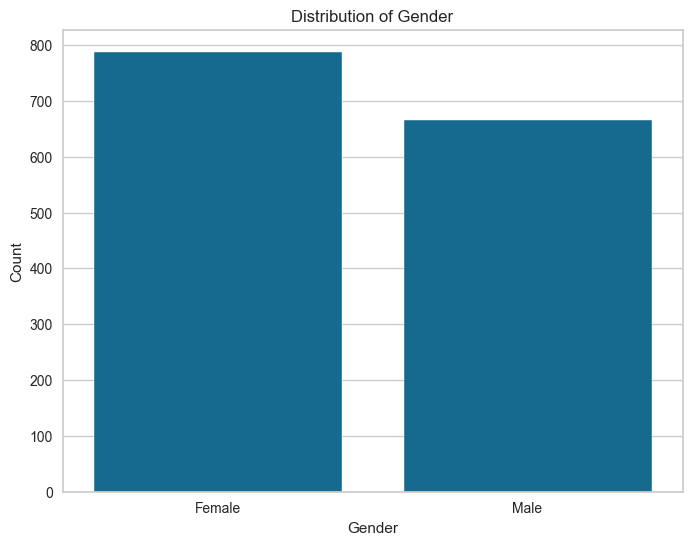

In [18]:
# Visualizing the distribution of the 'Gender' column
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Gender')
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.savefig('gender_distribution.png', dpi=300)  # Save the figure
plt.show()

#### **Demographic Segmentation:**

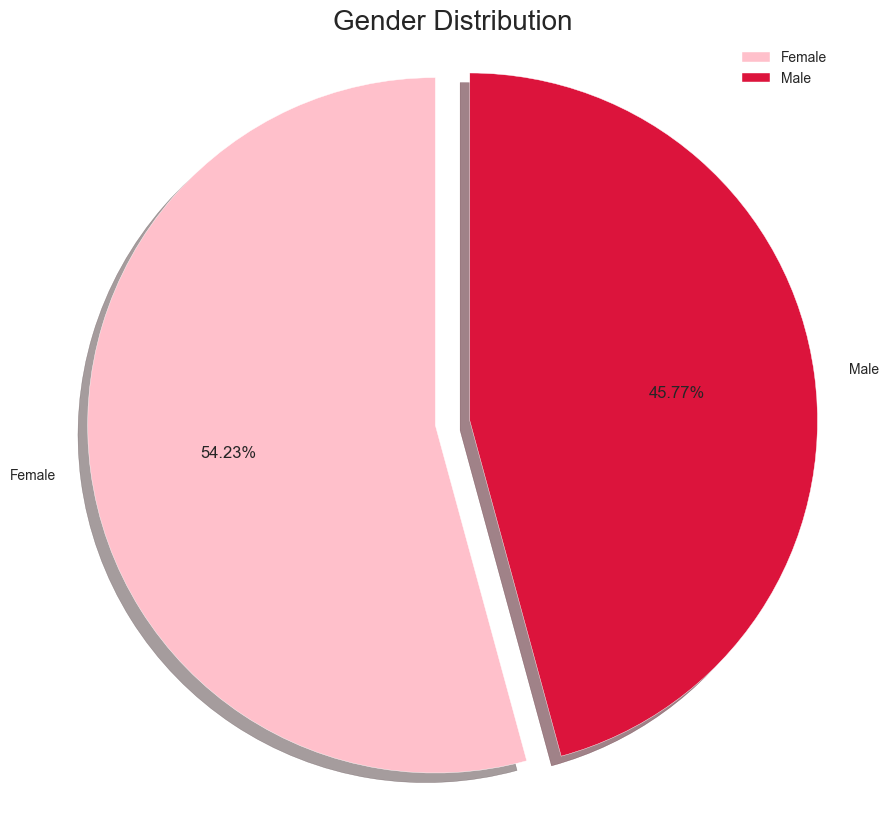

C:\Users\Sudheer Pulapa\AppData\Local\Temp\ipykernel_30216\4190475932.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  age_plot = sns.countplot(x=df['Age'], palette='viridis')


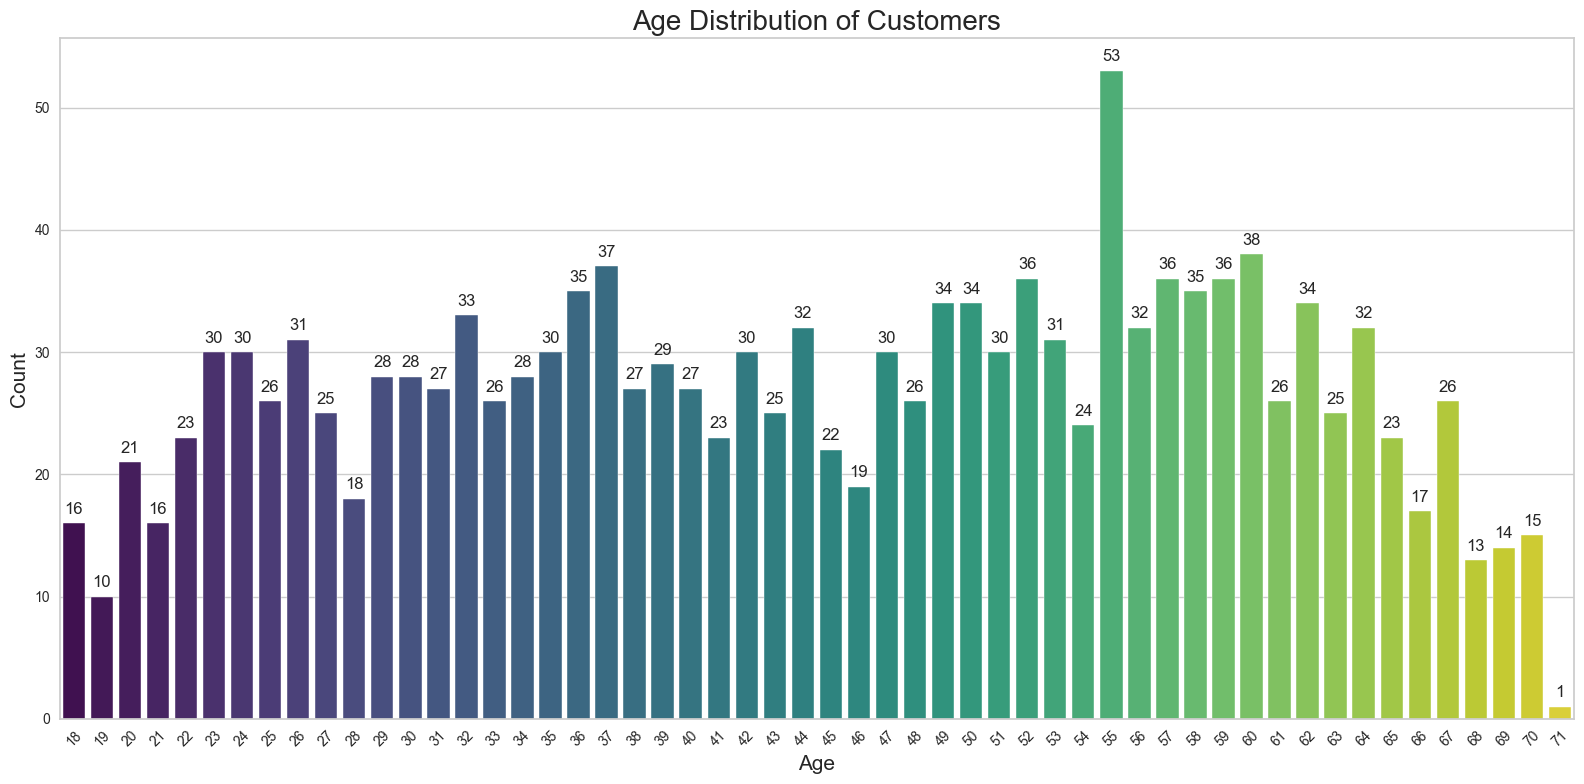

In [19]:
# Gender: Plotting pie chart
gender_labels = ['Female', 'Male']
gender_sizes = df['Gender'].value_counts()
gender_colors = ['pink', 'crimson']
gender_explode = [0, 0.1]

plt.figure(figsize=(10, 10))
plt.pie(gender_sizes, colors=gender_colors, explode=gender_explode, labels=gender_labels,
        shadow=True, autopct='%.2f%%', startangle=90)
plt.title('Gender Distribution', fontsize=20)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.legend()
plt.savefig("gender_distribution.png")  # Save the figure
plt.show()

# Age: Plotting countplot
plt.figure(figsize=(16, 8))
age_plot = sns.countplot(x=df['Age'], palette='viridis')
for p in age_plot.patches:
    age_plot.annotate(format(p.get_height(), '.0f'), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       xytext = (0, 10), 
                       textcoords = 'offset points')

plt.title('Age Distribution of Customers', fontsize=20)
plt.xlabel('Age', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("age_distribution.png")  # Save the figure
plt.show()

Correlation Matrix for Numeric Columns:
     Age
Age  1.0


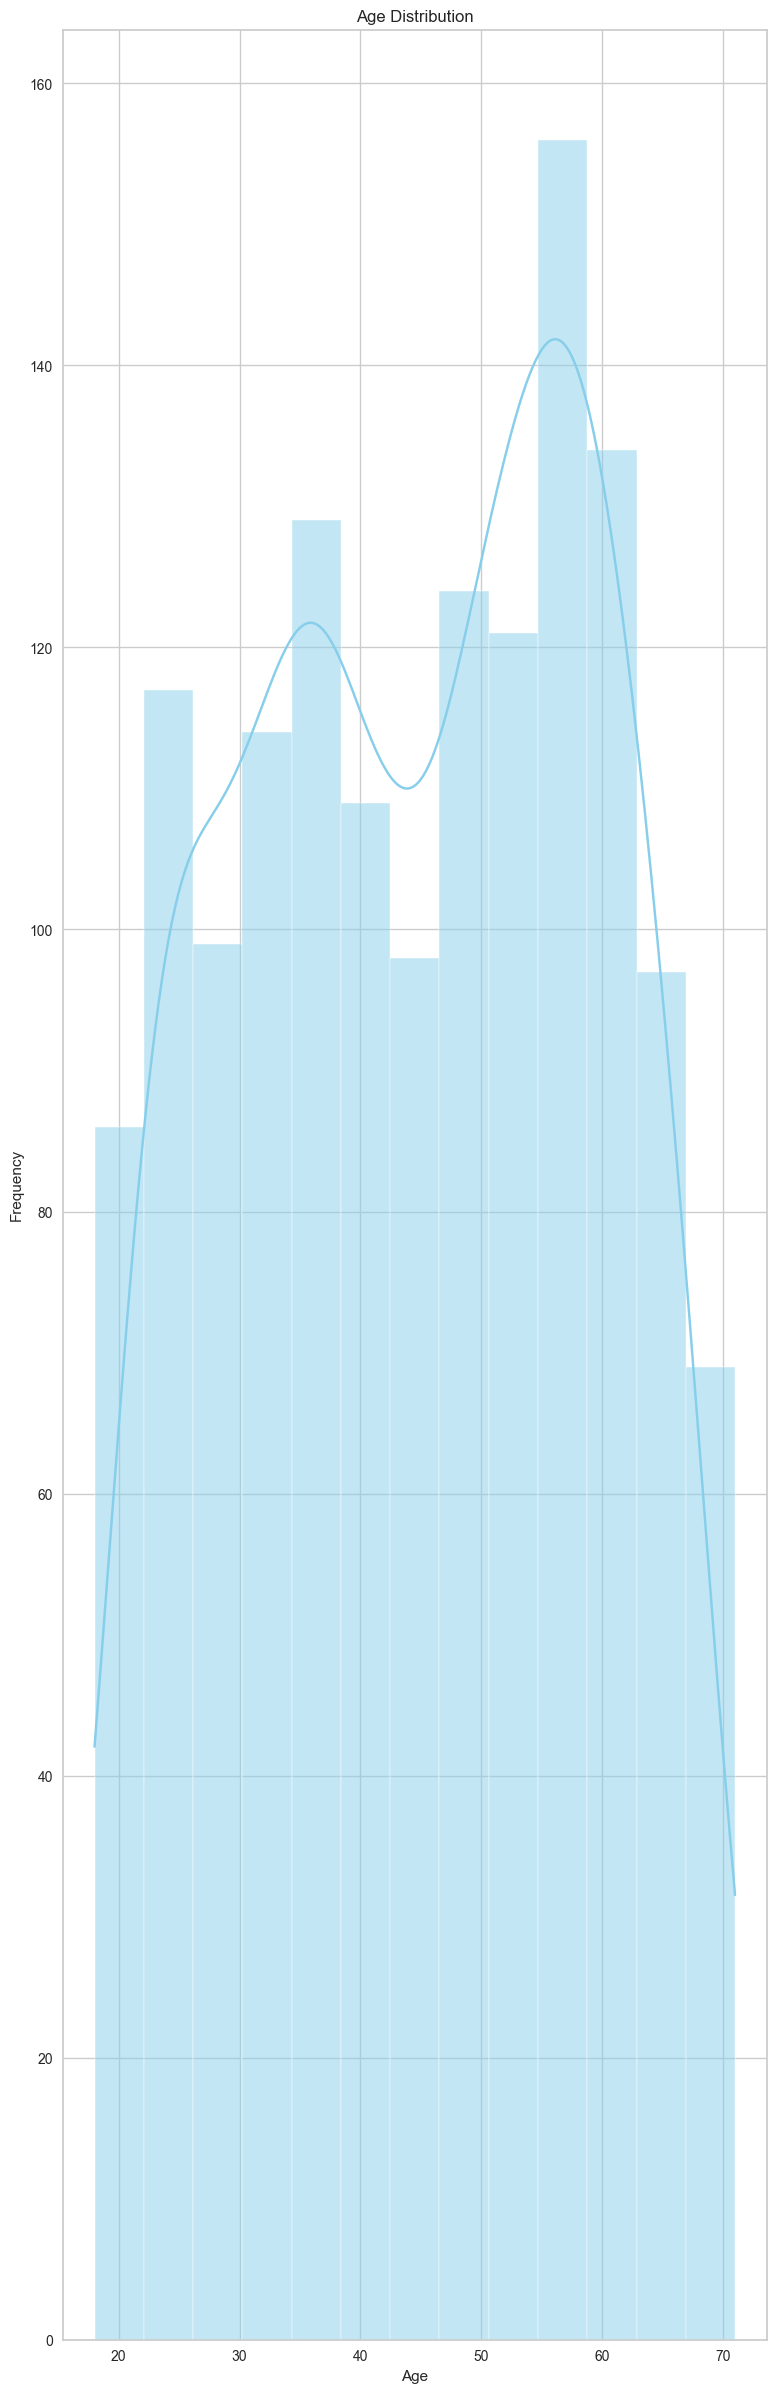

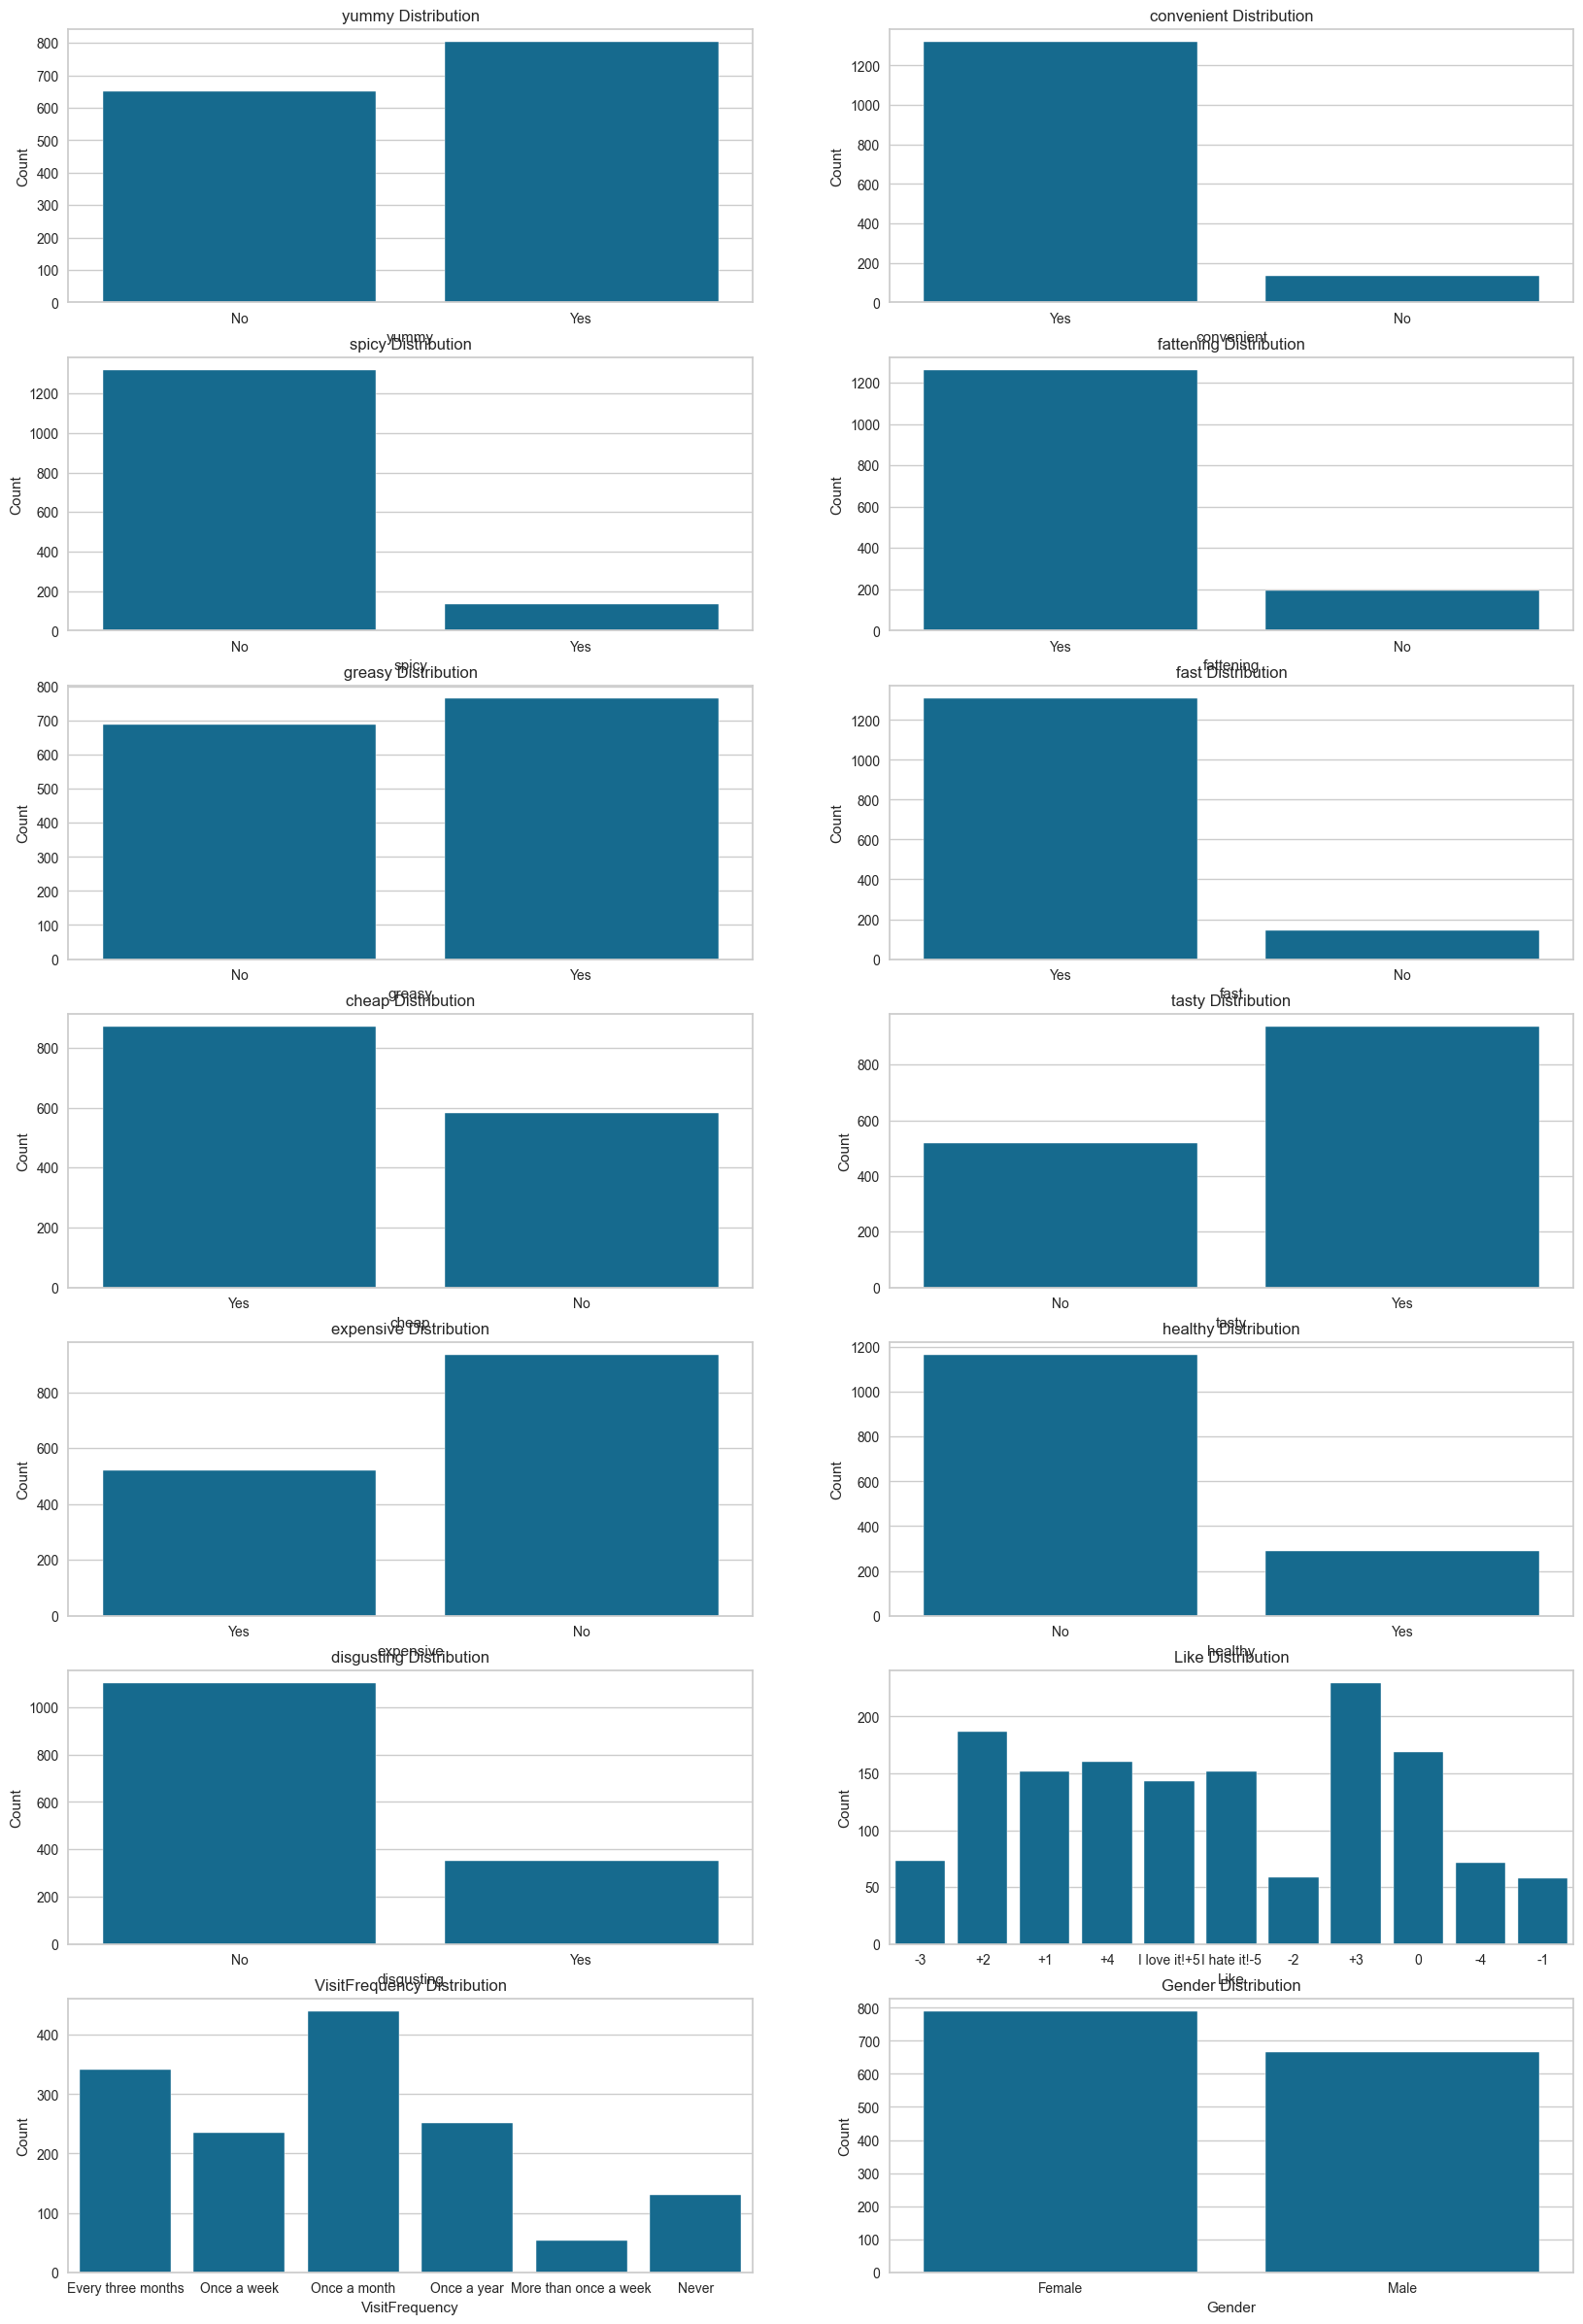

In [20]:
def EDA(df, figsize, save_path=None):
    import seaborn as sns
    import matplotlib.pyplot as plt
    from warnings import filterwarnings
    
    # Ignore warnings
    filterwarnings("ignore")
    
    # Initialize lists for categorical and continuous features
    cat_features = []
    con_features = []
    
    # Separate numeric and non-numeric columns
    numeric_columns = df.select_dtypes(include=['number']).columns
    categorical_columns = df.select_dtypes(include=['object']).columns
    
    # Calculate the number of rows needed for subplots
    num_rows_numeric = (len(numeric_columns) + 1) // 2
    num_rows_categorical = (len(categorical_columns) + 1) // 2
    
    # Create subplots for numeric variables
    plt.figure(figsize=figsize)
    
    # Counter for subplot positioning
    subplot_counter = 1
    
    # Iterate through numeric columns in the dataframe
    for column in numeric_columns:
        plt.subplot(num_rows_numeric, 2, subplot_counter)
        subplot_counter += 1
        sns.histplot(data=df, x=column, kde=True, color='skyblue')
        plt.title(f"{column} Distribution")
        plt.xlabel(column)
        plt.ylabel("Frequency")
    
    # Print correlation matrix for numeric columns only
    print("Correlation Matrix for Numeric Columns:")
    print(df[numeric_columns].corr())
    
    # Save the figure if save_path is provided
    if save_path:
        plt.savefig(save_path + "_numeric.png", dpi=300)
    
    # Create subplots for categorical variables
    plt.figure(figsize=figsize)
    
    # Counter for subplot positioning
    subplot_counter = 1
    
    # Iterate through categorical columns in the dataframe
    for column in categorical_columns:
        plt.subplot(num_rows_categorical, 2, subplot_counter)
        subplot_counter += 1
        sns.countplot(data=df, x=column)
        plt.title(f"{column} Distribution")
        plt.xlabel(column)
        plt.ylabel("Count")
    
    # Save the figure if save_path is provided
    if save_path:
        plt.savefig(save_path + "_categorical.png", dpi=300)
    
    # Show plots
    plt.show()

# Applying the function on the dataset with a specified figsize
EDA(df, (20, 30), save_path="eda_plots")

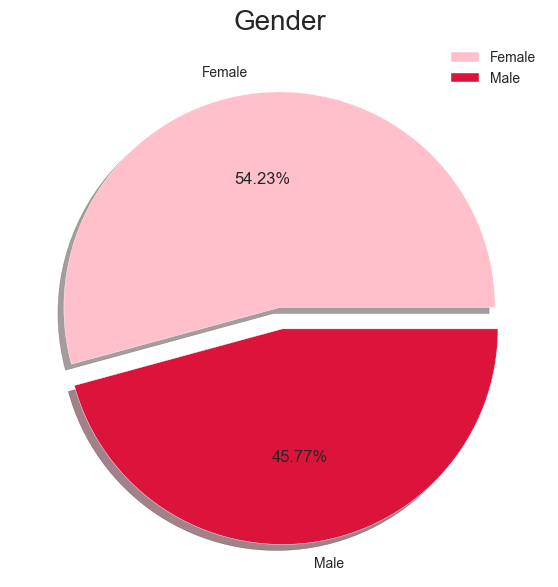

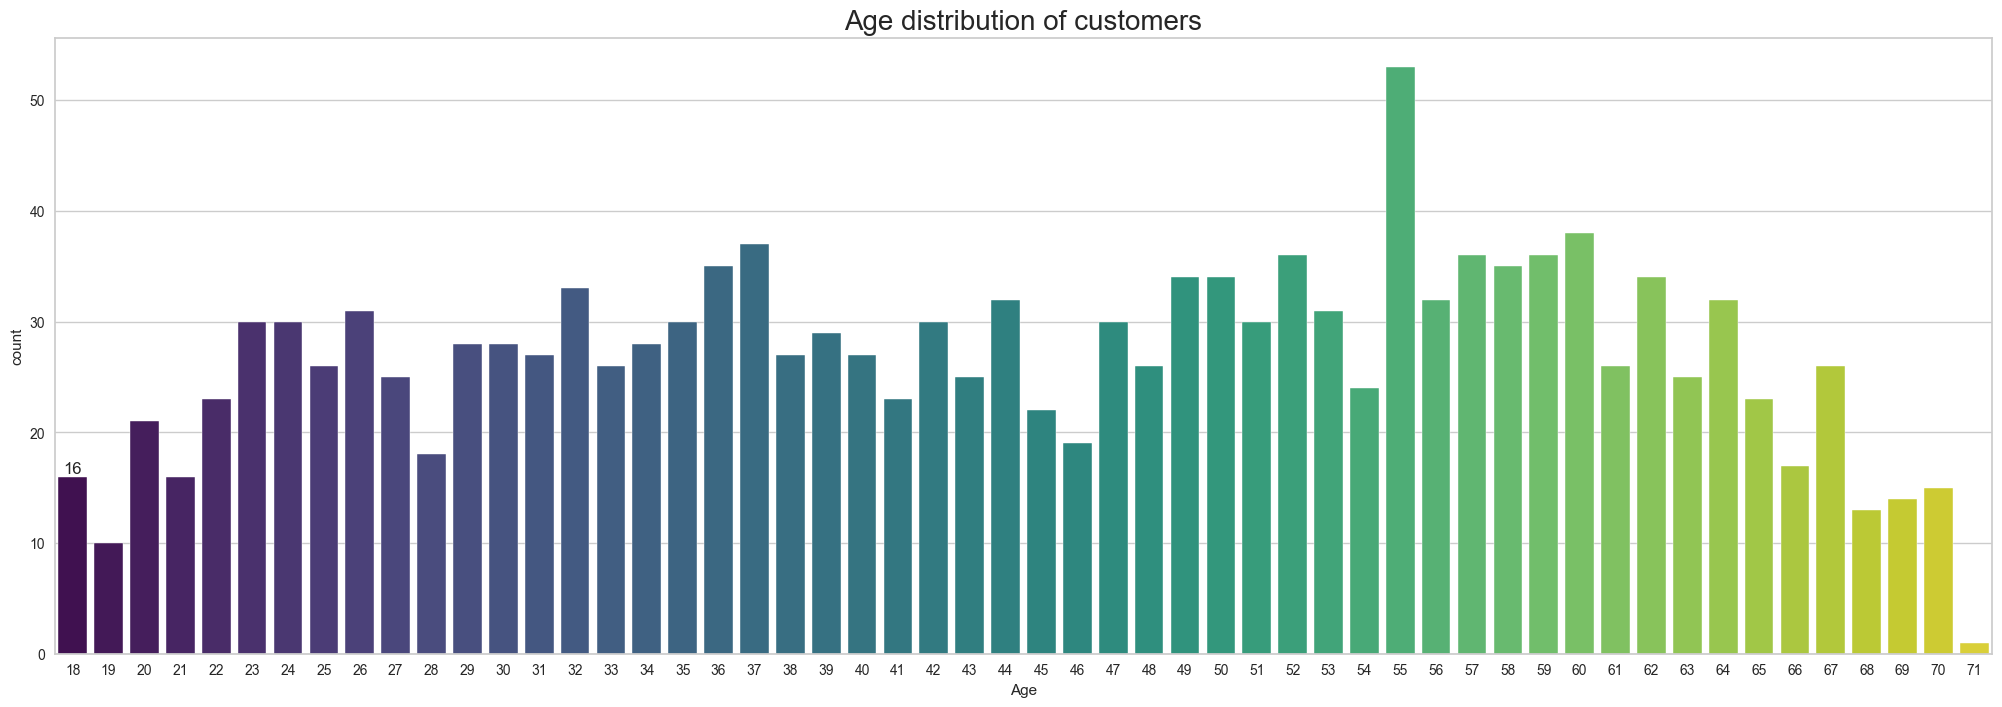

In [21]:
# Demographic segmentation using 'Age' & 'Gender'

# Gender: we infer that there are more female customers than male
labels = ['Female', 'Male']
size = df['Gender'].value_counts()
colors = ['pink', 'crimson']
explode = [0, 0.1]
plt.rcParams['figure.figsize'] = (7, 7)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

# Age: Mcdonalds recieve more customers of age between 50-60 and 35-40
plt.rcParams['figure.figsize'] = (25, 8)
data = sns.countplot(x=df['Age'], palette = 'viridis')
data.bar_label(data.containers[0])
plt.title('Age distribution of customers', fontsize = 20)
plt.show()

#### **Pscychographic Segmentation:**

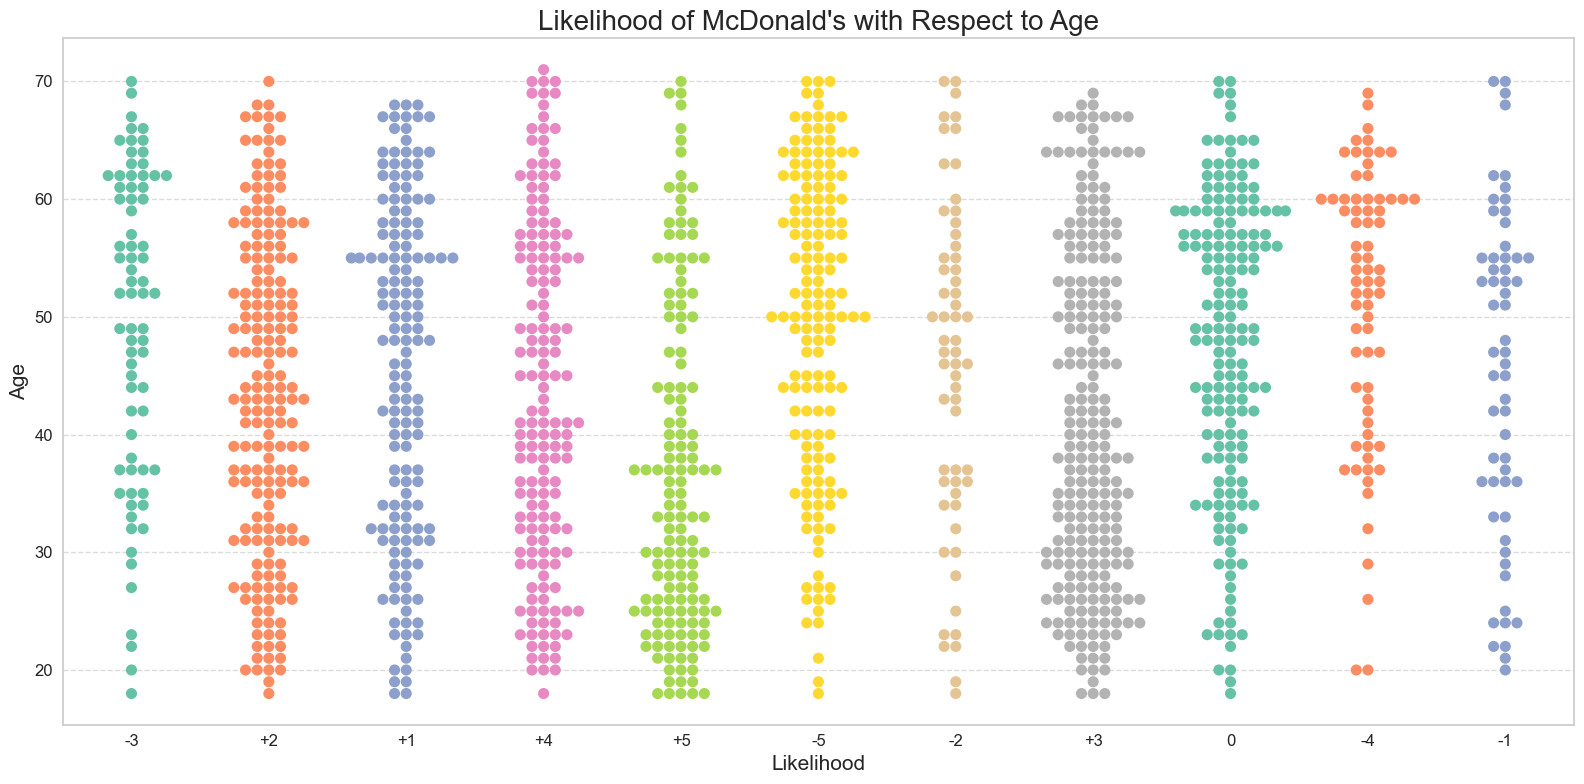

In [22]:
# Renaming the categories for convenience
df['Like'] = df['Like'].replace({'I hate it!-5': '-5', 'I love it!+5': '+5'})

# Plotting the results
plt.figure(figsize=(16, 8))
sns.swarmplot(data=df, x="Like", y="Age", palette="Set2", size=8)
plt.title('Likelihood of McDonald\'s with Respect to Age', fontsize=20)
plt.xlabel('Likelihood', fontsize=15)
plt.ylabel('Age', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Save the figure
plt.savefig("psychographic_segmentation.png")

plt.show()

### **4. Data Pre-Processing:**

In [23]:
# Columns other than Like, Age, VisitFrequency, Gender have binary features (Yes/No).
# Perform label encoding for further model building
df_new = df.drop(labels=['Like','Age','VisitFrequency','Gender'], axis=1)

In [24]:
# Displaying the first few rows of the modified DataFrame
df_new.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No


In [25]:
# Applying LabelEncoder to map 'Yes' to 1 and 'No' to 0 for all columns
df_encoded = df_new.apply(LabelEncoder().fit_transform)

# Displaying the first few rows of the encoded DataFrame
df_encoded.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0


### **5. Applying Dimensionality Reduction Technique - Principal Component Analysis:**

In [26]:
from sklearn import preprocessing
from sklearn.decomposition import PCA

In [27]:
# Applying scaling to the encoded data
scaled_data = preprocessing.scale(df_encoded)

# Applying PCA with 11 components
pca = PCA(n_components=11)
principal_components = pca.fit_transform(scaled_data)

# Creating a DataFrame to store the principal components
component_names = ['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'pc7', 'pc8', 'pc9', 'pc10', 'pc11']
pca_df = pd.DataFrame(data=principal_components, columns=component_names)

# Displaying the first few rows of the PCA DataFrame
pca_df.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11
0,0.704334,-0.437016,0.268698,-0.872074,-1.521184,0.470160,-0.030969,-0.687116,0.367598,0.321161,1.701170
1,-0.467820,0.364277,-1.596835,-0.004835,0.462385,-0.449321,0.087351,0.446003,0.221855,0.191268,1.467681
2,0.191986,1.712949,-0.339413,3.368168,-1.266802,0.148058,-0.606634,-0.668576,1.377226,-1.259300,-0.128530
3,-0.116991,-1.155122,-1.003913,0.469589,1.141750,-0.857182,0.015843,0.390275,-1.578539,0.092189,-0.233201
4,-0.034724,-1.390267,0.792275,0.473031,-0.270488,-0.847963,-1.804085,-0.700019,1.630339,0.092449,-0.033144


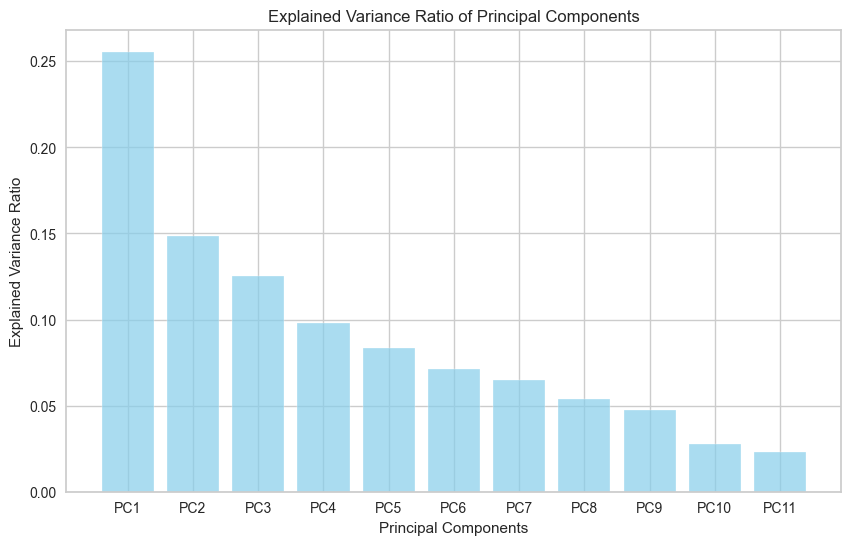

In [28]:
# Variance explained by each principal component (from PC1 to PC11)
explained_variance_ratio = pca.explained_variance_ratio_

# Plotting the variance explained by each principal component
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, color='skyblue', alpha=0.7)
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio of Principal Components')
plt.xticks(range(1, len(explained_variance_ratio) + 1), [f'PC{i}' for i in range(1, len(explained_variance_ratio) + 1)])

# Save the figure
plt.savefig('explained_variance_ratio.png', dpi=300)

plt.show()

In [29]:
# Get the loadings (correlation coefficients) between original variables and the principal components
loadings = pca.components_

# Get the number of principal components
num_pc = pca.n_features_

# Create a list of principal component names
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]

# Create a DataFrame to store the loadings
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))

# Add the original feature names as index
loadings_df['feature'] = df_encoded.columns.values
loadings_df = loadings_df.set_index('feature')

# Display the DataFrame
loadings_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
feature,,,,,,,,,,,
yummy,-0.406955,0.282615,-0.259588,0.026237,0.346857,-0.124916,0.159878,0.016587,-0.195341,0.691446,-0.091851
convenient,-0.308827,-0.045682,-0.317151,-0.009424,-0.437148,0.188966,-0.661814,0.150033,-0.336539,0.028831,0.021460
spicy,-0.023320,0.069982,0.020170,0.845496,-0.185551,0.438661,0.214188,-0.027835,0.025239,0.058187,-0.041960
fattening,0.177861,-0.205590,-0.608077,-0.023396,0.086934,0.107520,-0.023851,-0.720478,0.105052,-0.020311,-0.074626
greasy,0.267796,-0.136300,-0.389568,0.330854,0.343713,-0.278329,-0.307300,0.487275,0.346137,-0.015160,-0.031047
fast,-0.213039,-0.282441,-0.211395,0.090363,-0.568939,-0.572734,0.392436,0.055976,0.099235,0.017917,-0.054448
cheap,-0.289134,-0.575032,0.125157,0.114477,0.256981,0.020657,-0.008895,-0.064667,-0.062027,0.060323,0.691923
tasty,-0.426115,0.242199,-0.269648,0.072691,0.286099,-0.053053,0.197364,0.059289,-0.213587,-0.713426,0.006426
expensive,0.290944,0.567528,-0.183298,0.035510,-0.207362,-0.171160,0.015198,-0.061727,-0.009675,0.029581,0.693614


In [30]:
# correlation coefficient between original variables and the component
loadings = pca.components_
num_pc = pca.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['feature'] = df_encoded.columns.values
loadings_df = loadings_df.set_index('feature')
loadings_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
feature,,,,,,,,,,,
yummy,-0.406955,0.282615,-0.259588,0.026237,0.346857,-0.124916,0.159878,0.016587,-0.195341,0.691446,-0.091851
convenient,-0.308827,-0.045682,-0.317151,-0.009424,-0.437148,0.188966,-0.661814,0.150033,-0.336539,0.028831,0.021460
spicy,-0.023320,0.069982,0.020170,0.845496,-0.185551,0.438661,0.214188,-0.027835,0.025239,0.058187,-0.041960
fattening,0.177861,-0.205590,-0.608077,-0.023396,0.086934,0.107520,-0.023851,-0.720478,0.105052,-0.020311,-0.074626
greasy,0.267796,-0.136300,-0.389568,0.330854,0.343713,-0.278329,-0.307300,0.487275,0.346137,-0.015160,-0.031047
fast,-0.213039,-0.282441,-0.211395,0.090363,-0.568939,-0.572734,0.392436,0.055976,0.099235,0.017917,-0.054448
cheap,-0.289134,-0.575032,0.125157,0.114477,0.256981,0.020657,-0.008895,-0.064667,-0.062027,0.060323,0.691923
tasty,-0.426115,0.242199,-0.269648,0.072691,0.286099,-0.053053,0.197364,0.059289,-0.213587,-0.713426,0.006426
expensive,0.290944,0.567528,-0.183298,0.035510,-0.207362,-0.171160,0.015198,-0.061727,-0.009675,0.029581,0.693614


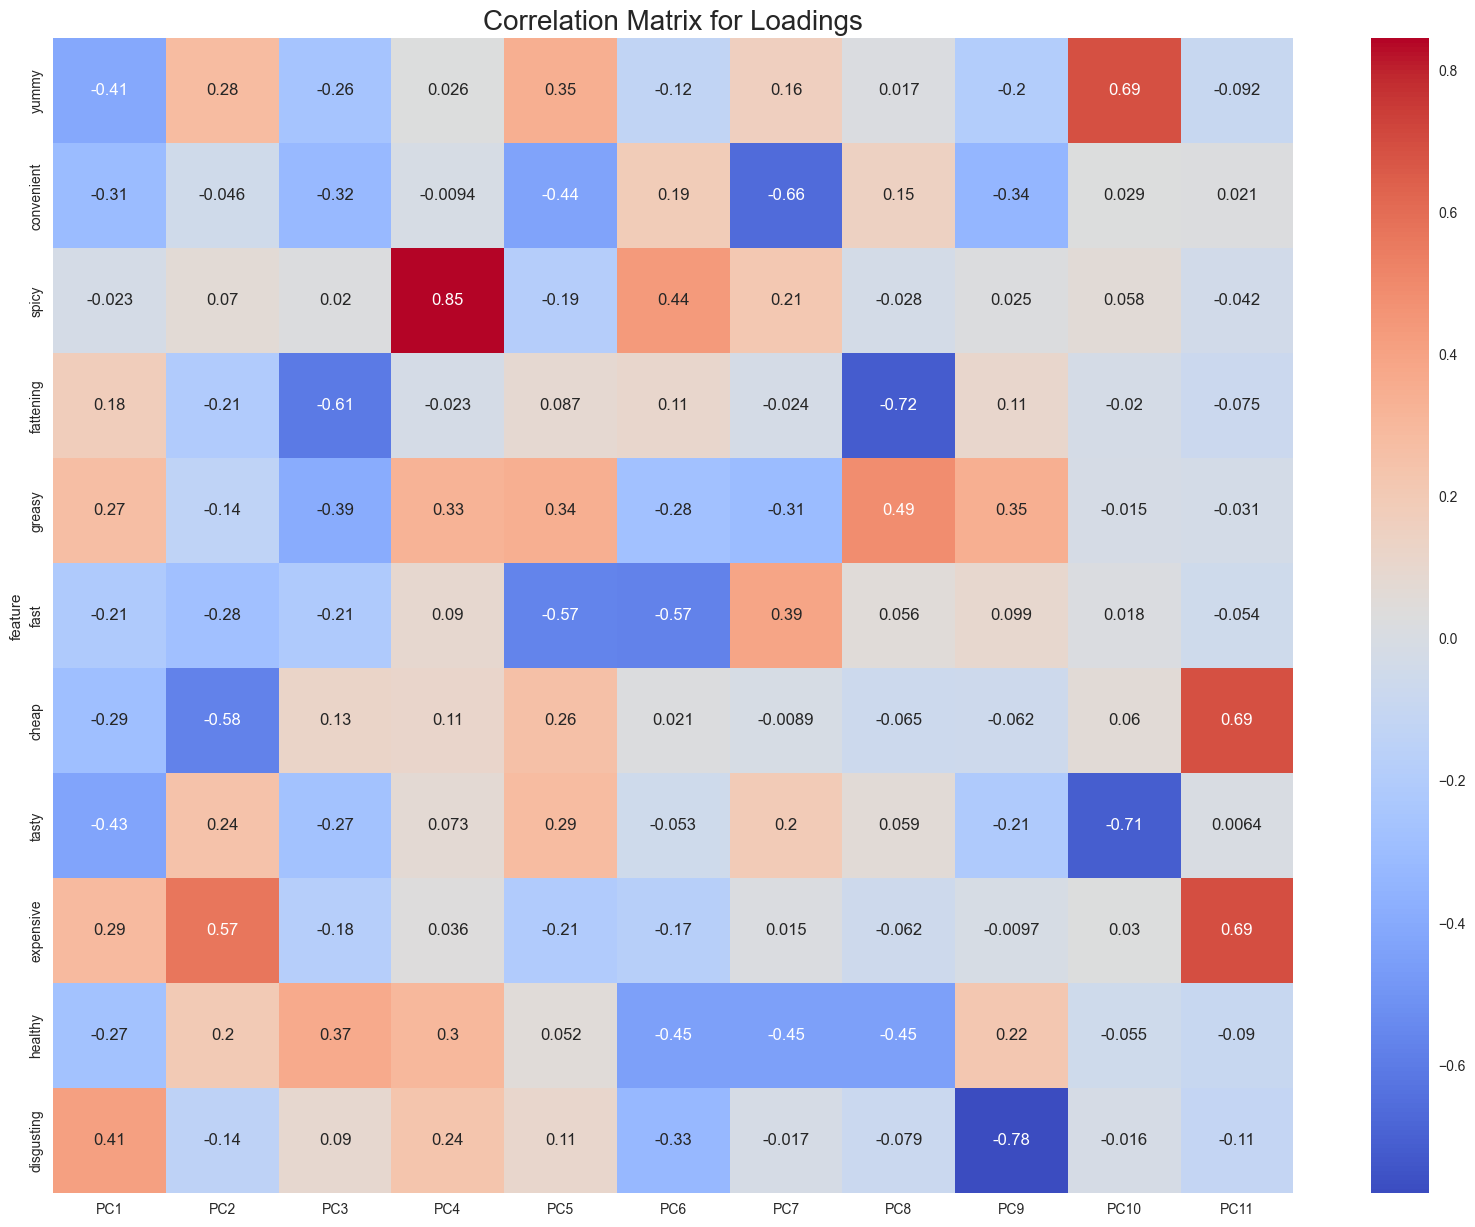

In [31]:
# Set the figure size
plt.figure(figsize=(20, 15))

# Plot the correlation matrix heatmap for loadings with a different colormap
ax = sns.heatmap(loadings_df, annot=True, cmap='coolwarm')

# Add a title to the plot
plt.title('Correlation Matrix for Loadings', fontsize=20)

# Save the figure
plt.savefig("correlation_matrix_loadings.png", dpi=300)

# Show the plot
plt.show()

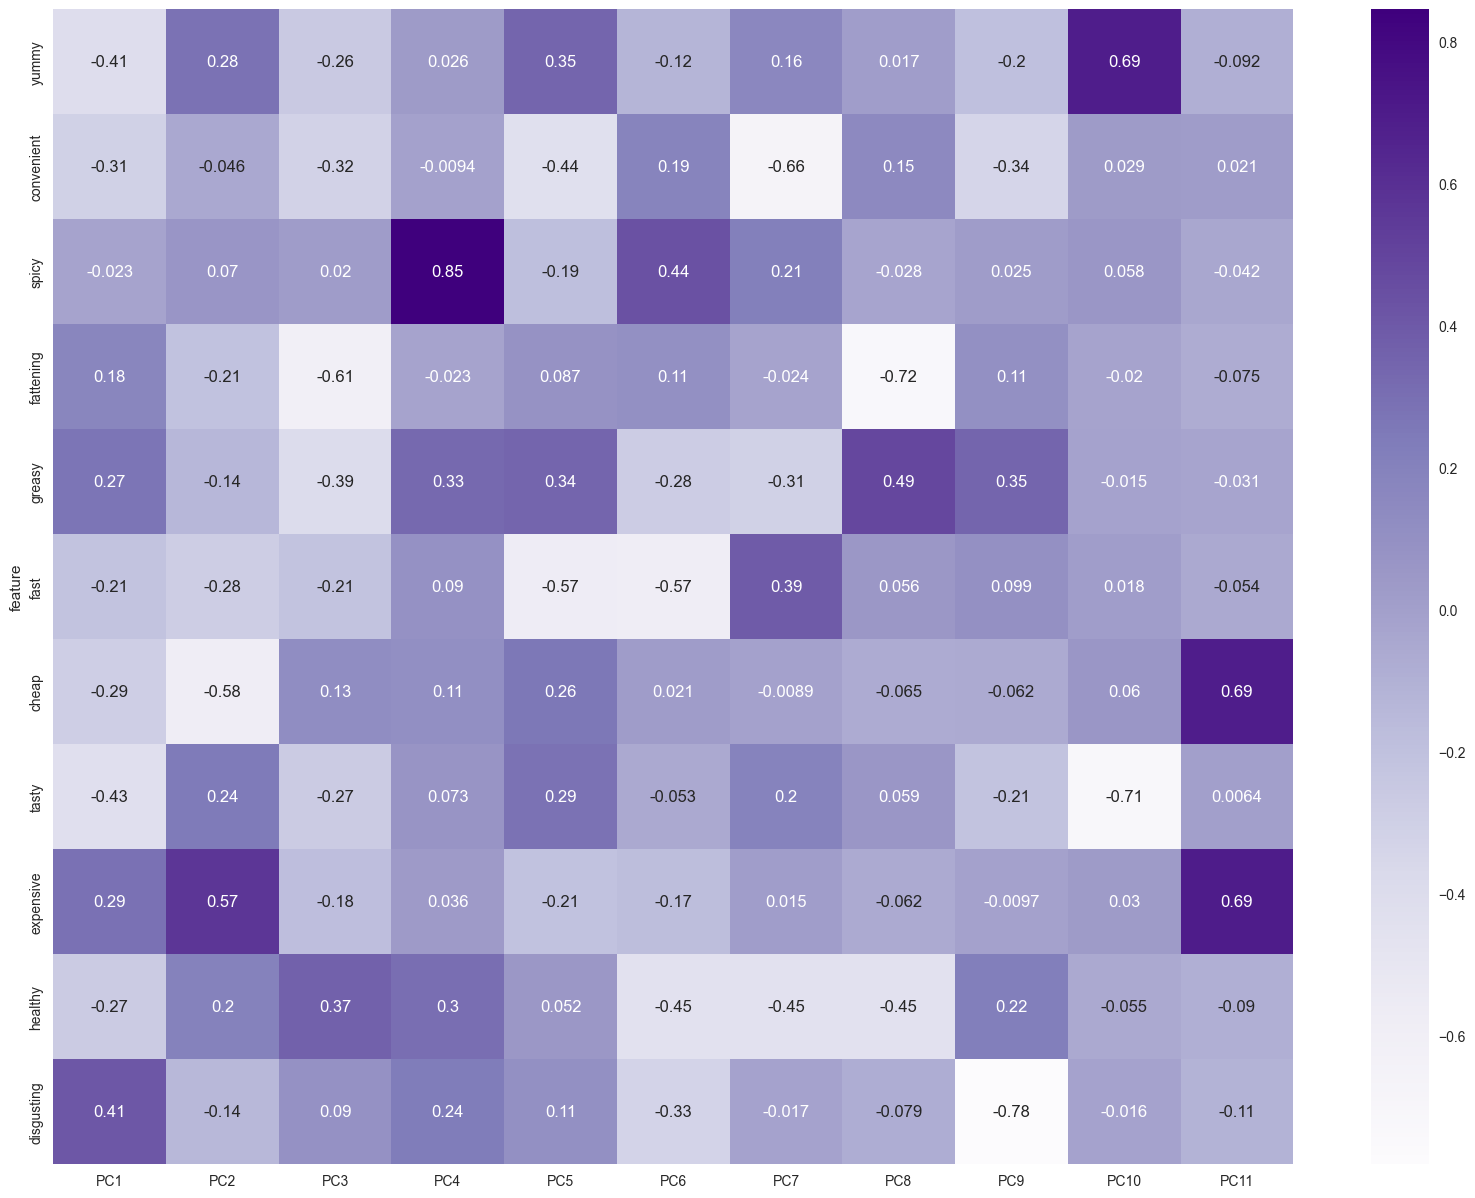

In [32]:
# correlation matrix plot for loadings 
plt.rcParams['figure.figsize'] = (20,15)
ax = sns.heatmap(loadings_df, annot=True, cmap='Purples')
plt.show()

<Figure size 1200x800 with 0 Axes>

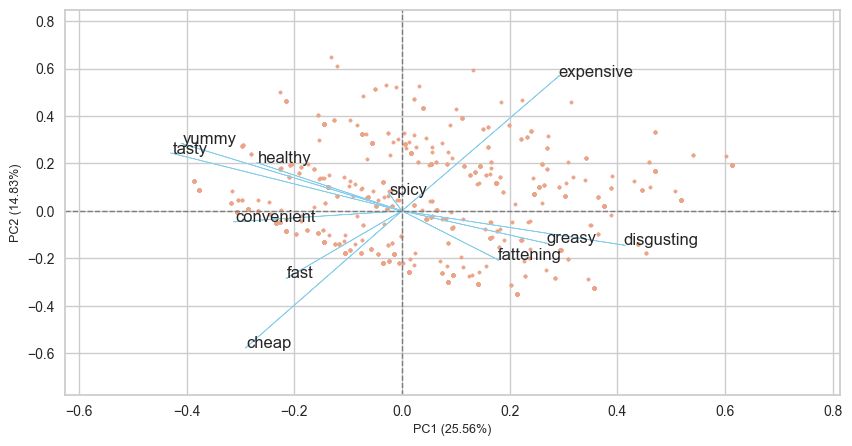

In [33]:
from bioinfokit.visuz import cluster

# Get PCA scores
pca_scores = PCA().fit_transform(pca_df)

# Set the figure size
plt.figure(figsize=(12, 8))

# Generate 2D biplot
cluster.biplot(cscore=pca_scores, loadings=loadings, labels=df.columns.values, 
               var1=round(pca.explained_variance_ratio_[0]*100, 2),
               var2=round(pca.explained_variance_ratio_[1]*100, 2), show=True, dim=(10, 5))

#### **Applying Elbow Method:**

In [34]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

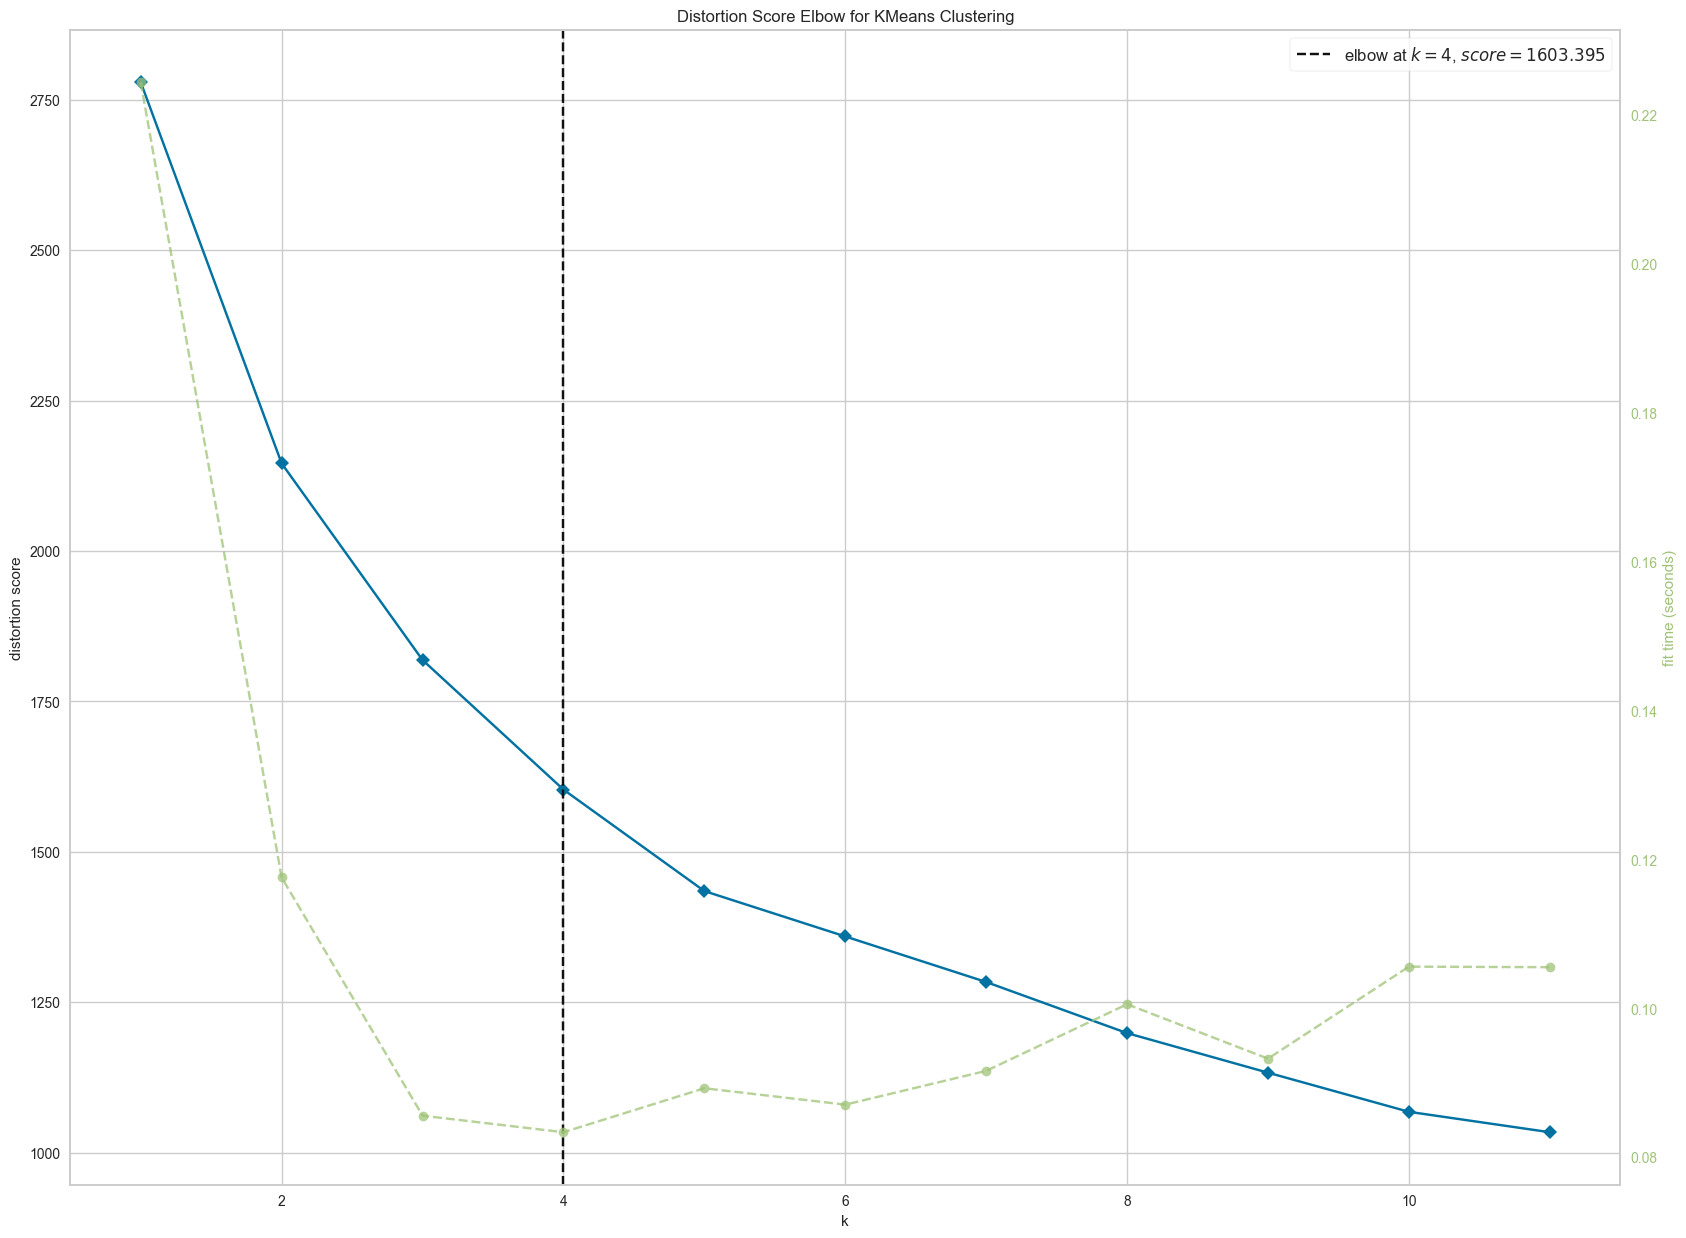

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [35]:
# Initialize KMeans model
model = KMeans()

# Visualize the optimal number of clusters using the elbow method
visualizer = KElbowVisualizer(model, k=(1, 12))
visualizer.fit(df_encoded)

# Customize the visualization
visualizer.set_title('Optimal Number of Clusters (K) - Elbow Method')
visualizer.show()

### **6. K-Means Clustering Algorithm:**

In [36]:
from collections import Counter

# K-means clustering
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(df_encoded)

# Add cluster labels to the dataframe
df['cluster_num'] = kmeans.labels_

# Print cluster labels assigned to each data point
print('Cluster Labels:', kmeans.labels_)

# Calculate the within-cluster sum of squares (WCSS)
print('Within-Cluster Sum of Squares (WCSS):', kmeans.inertia_)

# Number of iterations that k-means algorithm runs to converge
print('Number of Iterations:', kmeans.n_iter_)

# Coordinates of cluster centroids
print('Cluster Centroids:', kmeans.cluster_centers_)

# Check the size of each cluster
print('Cluster Size:', Counter(kmeans.labels_))

Cluster Labels: [2 0 0 ... 0 1 3]
Within-Cluster Sum of Squares (WCSS): 1603.060444055892
Number of Iterations: 8
Cluster Centroids: [[0.85448916 0.9628483  0.13312693 0.90712074 0.61919505 0.86068111
  0.10835913 0.93188854 0.89783282 0.20433437 0.10526316]
 [0.88793103 0.98103448 0.0862069  0.79482759 0.32931034 0.96034483
  0.92241379 0.97586207 0.01724138 0.32068966 0.04310345]
 [0.02302632 0.89144737 0.07236842 0.92434211 0.66776316 0.96381579
  0.93421053 0.15460526 0.01315789 0.07236842 0.38815789]
 [0.0203252  0.68292683 0.08536585 0.91463415 0.69512195 0.73170732
  0.06504065 0.08943089 0.87804878 0.06097561 0.71544715]]
Cluster Size: Counter({1: 580, 0: 323, 2: 304, 3: 246})


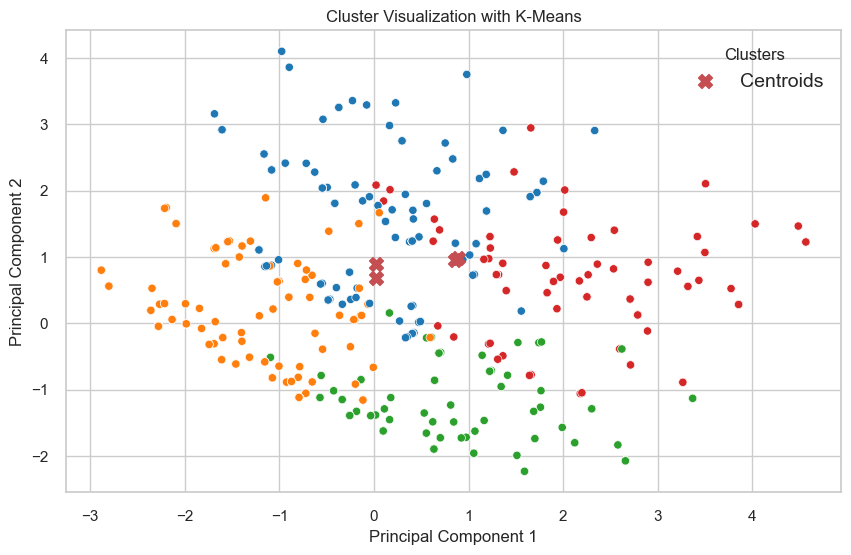

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# cluster visualization
sns.set(style="whitegrid")  # Set seaborn style
plt.figure(figsize=(10, 6))  # Set figure size

# Scatter plot
sns.scatterplot(data=pca_df, x="pc1", y="pc2", hue=kmeans.labels_, palette="tab10", legend=False)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker="X", c="r", s=100, label="Centroids")

# Add labels and title
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Cluster Visualization with K-Means")

# Add legend
plt.legend(title="Clusters", loc="upper right", fontsize = 14)

# Save figure
plt.savefig("cluster_visualization.png", dpi=300, bbox_inches="tight")

# Show plot
plt.show()

#### **Describing Segments:**

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Like,-5,-4,-3,-2,-1,0,+1,+2,+3,+4,+5
cluster_num,,,,,,,,,,,
0,5,3,7,6,7,36,42,60,66,47,44
1,4,4,2,6,13,43,65,90,143,111,99
2,54,36,34,28,25,51,31,31,12,2,0
3,89,28,30,19,13,39,14,6,8,0,0


<Figure size 1000x800 with 0 Axes>

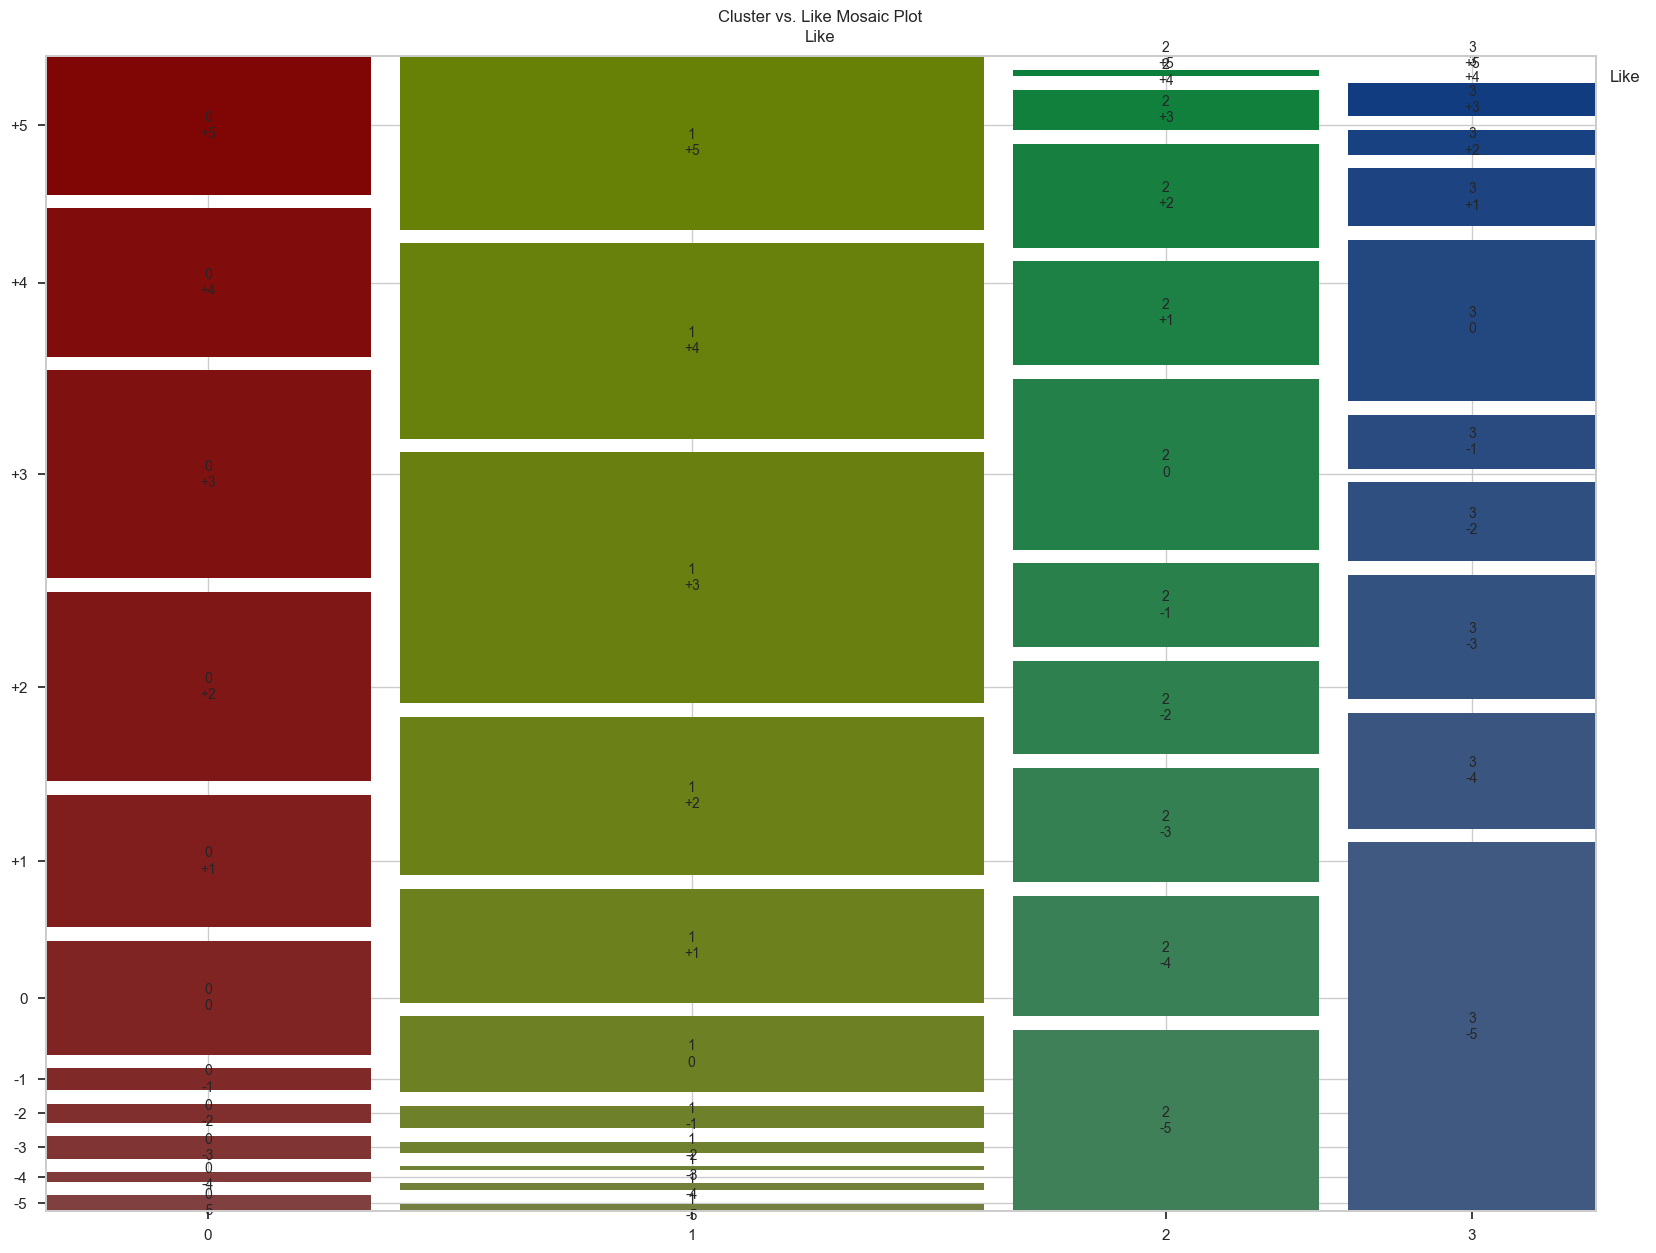

In [38]:
import pandas as pd
from statsmodels.graphics.mosaicplot import mosaic
import matplotlib.pyplot as plt

# Create cross-tabulation
crosstab = pd.crosstab(df['cluster_num'], df['Like'])

# Reorder columns for better visualization
crosstab = crosstab[['-5','-4','-3','-2','-1','0','+1','+2','+3','+4','+5']]

# Set figure size
plt.figure(figsize=(10, 8))

# Plot mosaic plot
mosaic(crosstab.stack(), gap=0.02, title='Cluster vs. Like Mosaic Plot')

# Set axis labels
plt.xlabel('Like', fontsize=12)
plt.ylabel('Cluster', fontsize=12)

# Add legend
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Like')

# Save figure
plt.savefig('mosaic_plot.png', dpi=300, bbox_inches='tight')

# Display cross-tabulation
display(crosstab)

# Show plot
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Gender,Female,Male
cluster_num,,
0,154,169
1,349,231
2,179,125
3,106,140


<Figure size 1000x800 with 0 Axes>

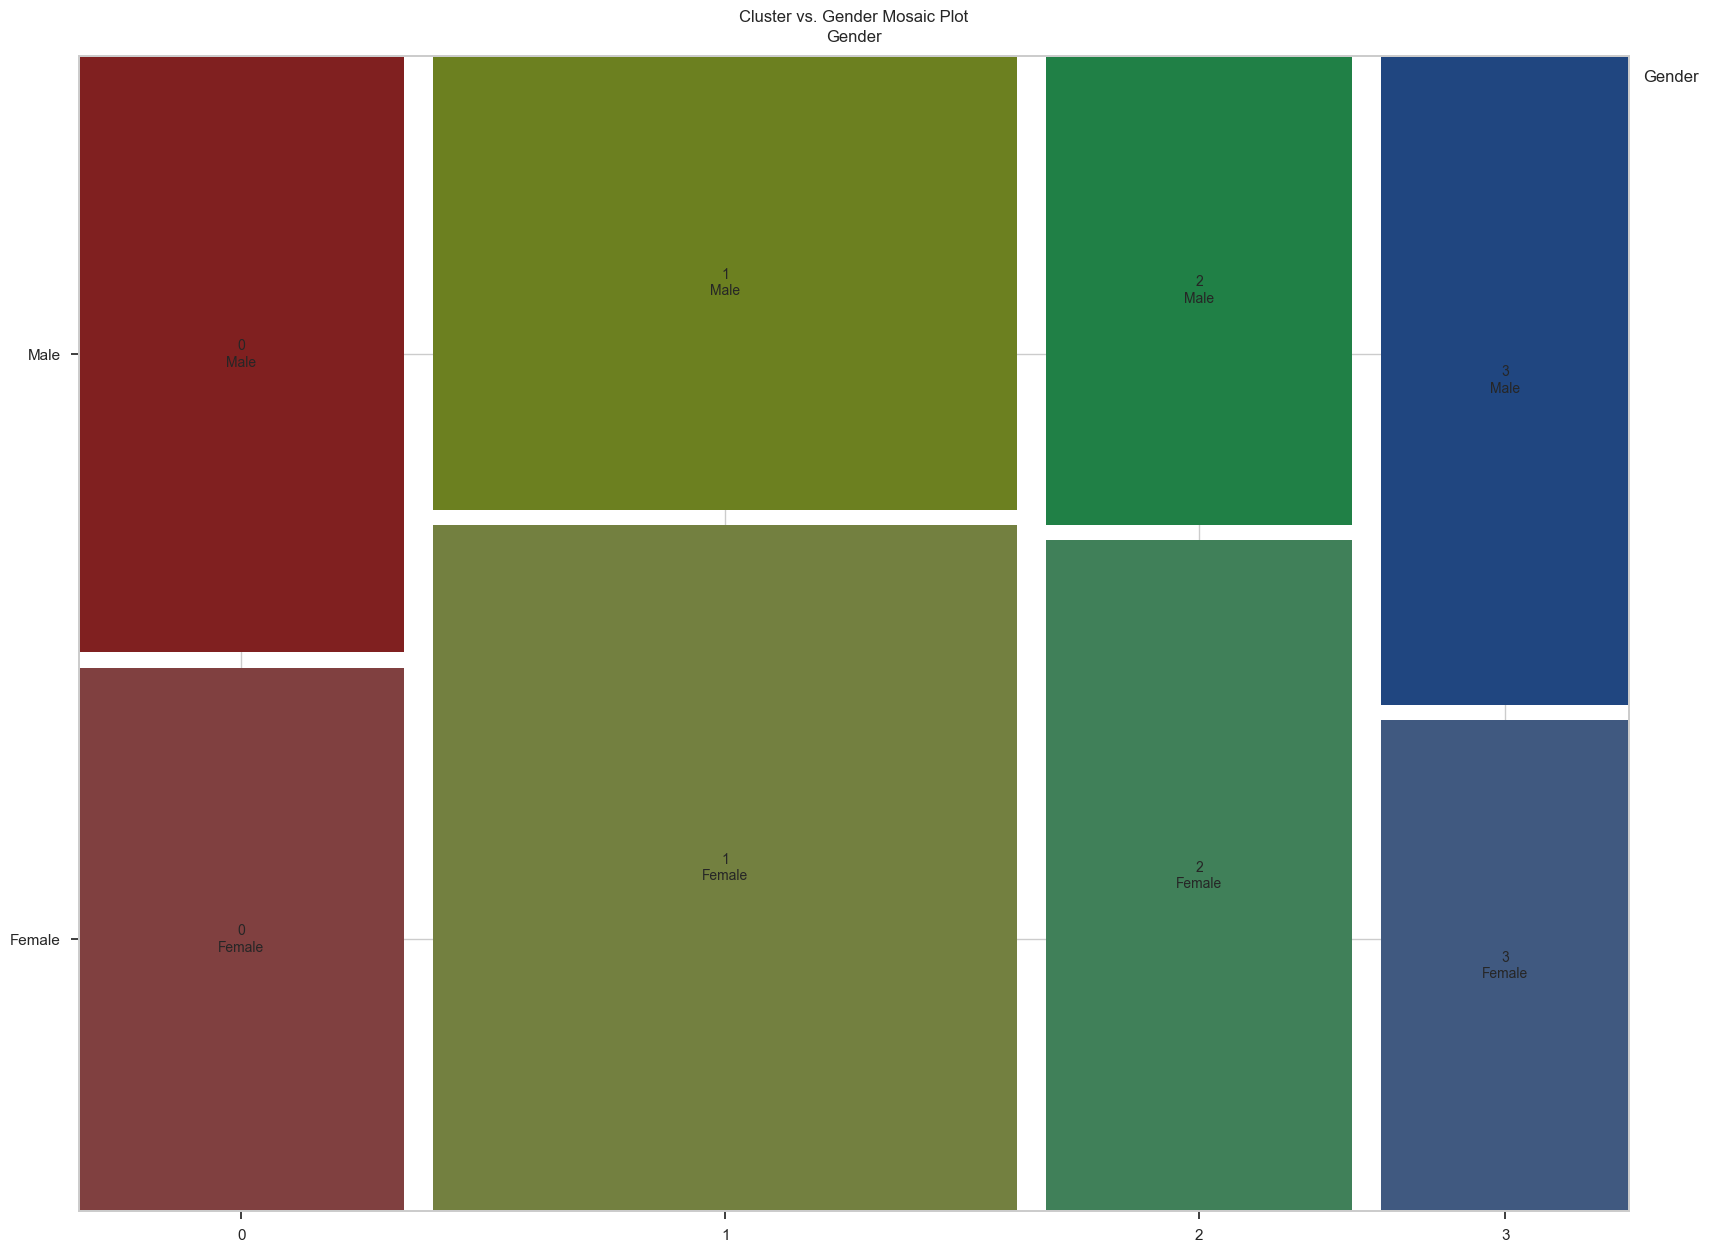

In [39]:
import pandas as pd
from statsmodels.graphics.mosaicplot import mosaic
import matplotlib.pyplot as plt

# Create cross-tabulation
crosstab_gender = pd.crosstab(df['cluster_num'], df['Gender'])

# Set figure size
plt.figure(figsize=(10, 8))

# Plot mosaic plot
mosaic(crosstab_gender.stack(), gap=0.02, title='Cluster vs. Gender Mosaic Plot')

# Set axis labels
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Cluster', fontsize=12)

# Add legend
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Gender')

# Save figure
plt.savefig('mosaic_plot_gender.png', dpi=300, bbox_inches='tight')

# Display cross-tabulation
display(crosstab_gender)

# Show plot
plt.show()

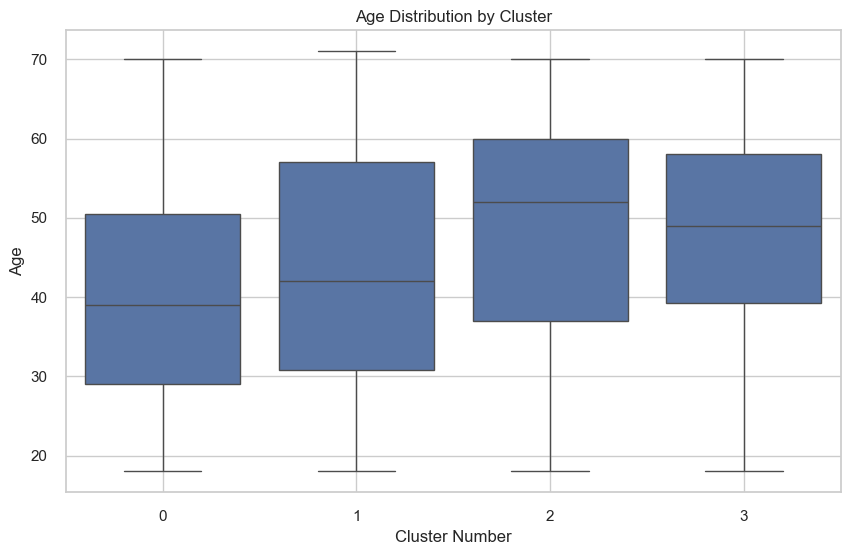

In [40]:
# Box plot for 'Age' with cluster numbers
plt.figure(figsize=(10, 6))  # Set figure size
sns.boxplot(x="cluster_num", y="Age", data=df)
plt.title('Age Distribution by Cluster')
plt.xlabel('Cluster Number')
plt.ylabel('Age')
plt.grid(True)  # Add gridlines for better readability

# Save the figure
plt.savefig("age_distribution_by_cluster.png", dpi=300)

# Show the plot
plt.show()

#### **Selecting the Target Segment:**

In [41]:
# Calculate the mean of 'VisitFrequency' within each cluster
df['VisitFrequency'] = LabelEncoder().fit_transform(df['VisitFrequency'])
visit = df.groupby('cluster_num')['VisitFrequency'].mean()

# Convert the series to a dataframe and reset index for better readability
visit = visit.to_frame().reset_index()

# Add column names to the dataframe
visit.columns = ['Cluster Number', 'Mean Visit Frequency']

# Display the dataframe
visit

,Cluster Number,Mean Visit Frequency
0,0,2.547988
1,1,2.584483
2,2,2.822368
3,3,2.654472


In [42]:
# Calculate the mean of 'Like' within each cluster
df['Like'] = LabelEncoder().fit_transform(df['Like'])
Like = df.groupby('cluster_num')['Like'].mean()

# Convert the series to a dataframe and reset index for better readability
Like = Like.to_frame().reset_index()

# Add column names to the dataframe
Like.columns = ['Cluster Number', 'Mean Like']

# Display the dataframe
Like

,Cluster Number,Mean Like
0,0,3.275542
1,1,2.962069
2,2,6.171053
3,3,7.422764


In [43]:
# Calculate the mean of 'Gender' within each cluster
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])
Gender = df.groupby('cluster_num')['Gender'].mean()

# Convert the series to a dataframe and reset index for better readability
Gender = Gender.to_frame().reset_index()

# Add column names to the dataframe
Gender.columns = ['Cluster Number', 'Mean Gender']

# Display the dataframe
Gender

,Cluster Number,Mean Gender
0,0,0.523220
1,1,0.398276
2,2,0.411184
3,3,0.569106


In [44]:
Gender.columns 

Index(['Cluster Number', 'Mean Gender'], dtype='object')

In [45]:
# Merge the 'Gender', 'Like', and 'VisitFrequency' mean dataframes on 'cluster_num'
segment = Gender.merge(Like, on='Cluster Number', how='left').merge(visit, on='Cluster Number', how='left')

# Add column names to the dataframe for better readability
segment.columns = ['Cluster Number', 'Mean Gender', 'Mean Like', 'Mean VisitFrequency']

# Display the merged dataframe
segment

,Cluster Number,Mean Gender,Mean Like,Mean VisitFrequency
0,0,0.523220,3.275542,2.547988
1,1,0.398276,2.962069,2.584483
2,2,0.411184,6.171053,2.822368
3,3,0.569106,7.422764,2.654472


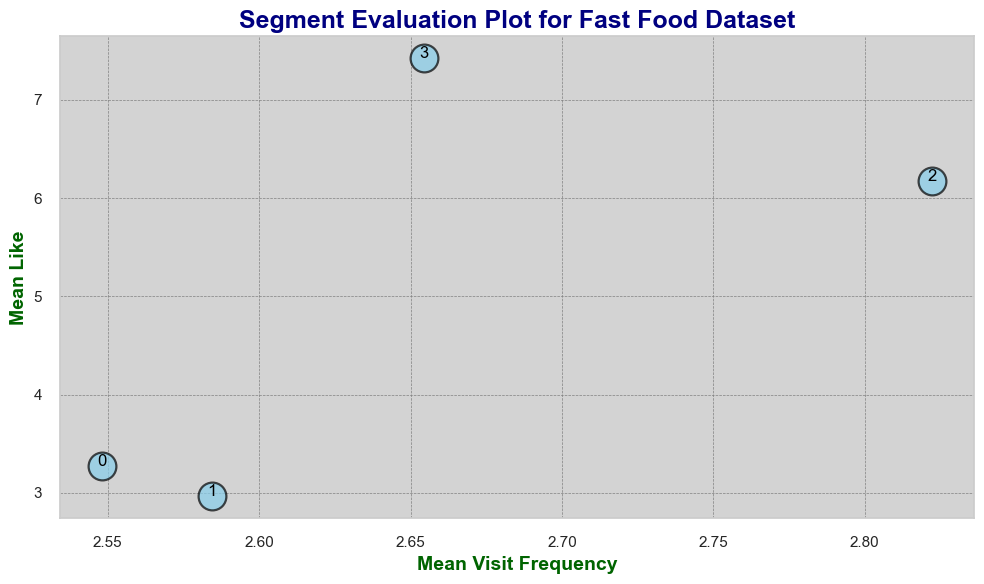

In [46]:
# Targeting segments with enhanced and visually appealing plot
plt.figure(figsize=(10, 6))

# Scatter plot with 'Mean VisitFrequency' on the x-axis and 'Mean Like' on the y-axis
sns.scatterplot(x="Mean VisitFrequency", y="Mean Like", data=segment, s=400, color="skyblue", edgecolor="black", alpha=0.7)

# Adding annotations for each segment (optional)
for i, txt in enumerate(segment['Cluster Number']):
    plt.annotate(txt, (segment['Mean VisitFrequency'][i], segment['Mean Like'][i]), fontsize=12, color='black', ha='center')

# Adding title and labels with customized font style
plt.title("Segment Evaluation Plot for Fast Food Dataset", fontsize=18, fontweight='bold', color='navy')
plt.xlabel("Mean Visit Frequency", fontsize=14, fontweight='bold', color='darkgreen')
plt.ylabel("Mean Like", fontsize=14, fontweight='bold', color='darkgreen')

# Customize grid lines
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')

# Customize plot background color
plt.gca().set_facecolor('lightgray')

# Save the figure with a descriptive filename
plt.savefig('segment_evaluation_plot.png', dpi=300)

# Display the plot
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

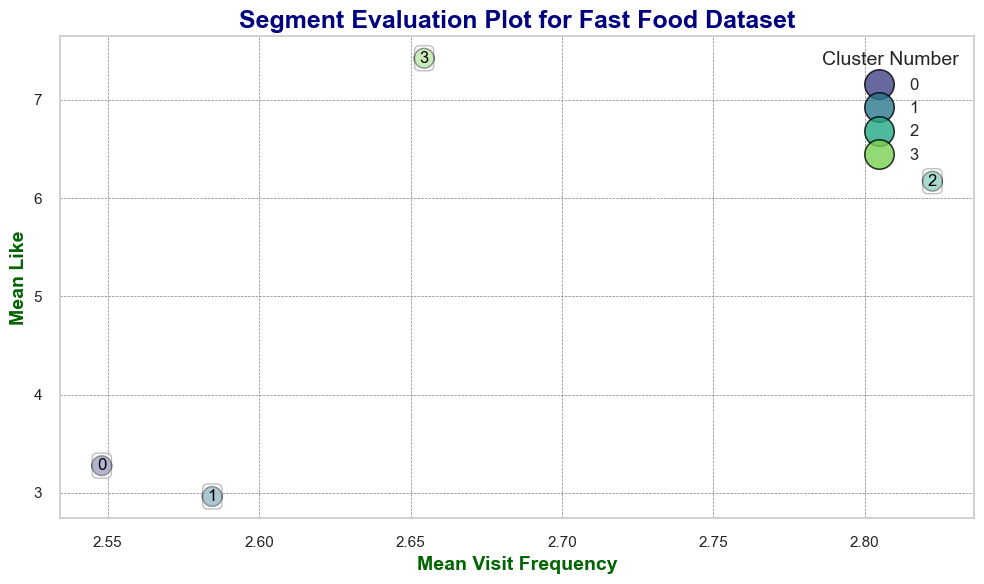

In [47]:
# Targeting segments with enhanced and visually appealing plot
plt.figure(figsize=(10, 6))

# Define gradient colors for markers based on cluster number
colors = sns.color_palette("viridis", len(segment))

# Scatter plot with 'Mean VisitFrequency' on the x-axis and 'Mean Like' on the y-axis
scatter = sns.scatterplot(x="Mean VisitFrequency", y="Mean Like", data=segment, s=200, hue='Cluster Number',
                          palette=colors, edgecolor="black", alpha=0.8, marker='o')

# Adding annotations for each segment (optional)
for i, txt in enumerate(segment['Cluster Number']):
    plt.annotate(txt, (segment['Mean VisitFrequency'][i], segment['Mean Like'][i]), fontsize=12, color='black',
                 ha='center', va='center', bbox=dict(facecolor='white', alpha=0.5, edgecolor='gray', boxstyle='round,pad=0.3'))

# Customize legend
plt.legend(title='Cluster Number', title_fontsize='14', loc='upper right', fontsize='12', markerscale=1.5)

# Adding title and labels with customized font style
plt.title("Segment Evaluation Plot for Fast Food Dataset", fontsize=18, fontweight='bold', color='navy')
plt.xlabel("Mean Visit Frequency", fontsize=14, fontweight='bold', color='darkgreen')
plt.ylabel("Mean Like", fontsize=14, fontweight='bold', color='darkgreen')

# Customize grid lines
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')

# Save the figure with a descriptive filename
plt.savefig('segment_evaluation_plot.png', dpi=300)

# Display the plot
plt.tight_layout()  # Adjust layout for better spacing
plt.show()